# Project Context

This project was developed under the scope of Machine Learning Curricular Unit at NOVA IMS. The data provided here is not real data.

# Business Understanding

<p style="text-align: justify"> LaGoste Stores is a company that operates in the fashion, sports and luxury sectors. Their products offer consists in five categories: Sneakers, Rackets, T-Shirts, Watches and Hats, each one divided in Premium Brand and Mainstream Articles. All the products can be purchased in physical stores, in their website or ordered through their quaterly catalogs. Currently, they sell their products to more than one million consumers every year and they have around 300 000 registered customers</p>

# The Challenge
<p style="text-align: justify">In spite of having solid revenues and a healthy bottom line for the past five years, the company's profit growth perspectives for the next two years are not optimistic. In order to change those perspectives the company is outlining some strategic initiatives.</p>

# Objectives
<p style="text-align: justify">One of the strategies being studied and that will play an important role in the profit growth is the efficiency of the marketing campaigns.</p>
<p style="text-align: justify">Therefore, based on the company's customer database we will have to use quantitative technics to identify relevant segments of clients and define a profile for each one.</p> 
<p style="text-align: justify">We will start our analysis by focusing in the two visons considered the most important: the <b>customer value segmentation</b> and the <b>product usage segmentation</b>.</p>
<p style="text-align: justify"> Nevertheless, if during our analysis we find usefull information to identify and charactize other customer groups, we will integrate it in the report as it can help defining new campaign targets.</p>

# 1. Import libraries

We will start by importing some of the libraries and modules that we will need to use in this file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Data Pre-processing

<p style="text-align: justify">The reason why pre-processing data is perhaps the most important step in a Data Science project is because most of the times the databases have unprocessed, incomplete and noisy data. And what does it means? It means that this data usually have a set of scenarios that will feed GIGO and in order o minimize it we need to perform data cleaning and data transformation. Missing values, outliers and redundant fields are a few examples that can be found in unprocessed data. In this chapter we will do these two principal methods in order to prepar the data for further analysis and segmentation identification.</p>

## Import Dataset

In [2]:
dataset = pd.read_excel(r'Group34_LaGoste_Campaign.xlsx')

Lets take a quick view of our imported DataFrame dimensionality to verify the number of rows and columns,

In [3]:
dataset.shape

(2500, 27)

In [4]:
pd.set_option('max_columns', None) # with this code we will be able to see all columns every time we call a dataset

Quick overview of the first data rows using <i>pandas.DataFrame.head()</i>,

In [5]:
dataset.head()

Custid  Year_Birth   Education Marital_Status   Income  Kidhome  \
0  70004216        1969  Graduation        Married  48141.0        0   
1  70004220        1968  Graduation       Divorced  30271.0        1   
2  70004228        1973      Master       Together  27862.0        1   
3  70004252        1959  Graduation        Married  62742.0        0   
4  70004260        1967       Basic       Together  42826.0        1   

   Teenhome Dt_Customer  Recency  MntSneakers  MntTShirts  MntRackets  \
0         2  2017-06-21       12           20           2           9   
1         1  2017-02-02       17           25           2          11   
2         0  2016-09-14       56           14           0           5   
3         1  2015-11-30       64         1085          20         161   
4         1  2015-08-23       94           73           5         135   

   MntWatches  MntHats  MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
0           1      4.0              11.0                  1                5   
1           3      4.0               6.0                  4                6   
2           0      0.0               4.0                  1                5   
3          48    134.0              69.0                  4               11   
4           9      2.0              42.0                  7                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp2  \
0                    3                  3                  4             1   
1                    3                  4                  6             0   
2                    2                  3                  8             0   
3                    4                 12                  9             0   
4                    3                  5                  8             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  Complain  DepVar  
0             0             0             0             0         0       0  
1             0             0             0             0         0       0  
2             0             0             0             0         0       0  
3             0             0             0             0         0       0  
4             0             0             0             0         0       0

## Set Custid column as index

We chose Custid as our index because it has unique values to identify each customer.

In [6]:
dataset.set_index('Custid', inplace=True)
dataset.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
Custid                                                                        
70004216        1969  Graduation        Married  48141.0        0         2   
70004220        1968  Graduation       Divorced  30271.0        1         1   
70004228        1973      Master       Together  27862.0        1         0   
70004252        1959  Graduation        Married  62742.0        0         1   
70004260        1967       Basic       Together  42826.0        1         1   

         Dt_Customer  Recency  MntSneakers  MntTShirts  MntRackets  \
Custid                                                               
70004216  2017-06-21       12           20           2           9   
70004220  2017-02-02       17           25           2          11   
70004228  2016-09-14       56           14           0           5   
70004252  2015-11-30       64         1085          20         161   
70004260  2015-08-23       94           73           5         135   

          MntWatches  MntHats  MntPremium_Brand  NumDealsPurchases  \
Custid                                                               
70004216           1      4.0              11.0                  1   
70004220           3      4.0               6.0                  4   
70004228           0      0.0               4.0                  1   
70004252          48    134.0              69.0                  4   
70004260           9      2.0              42.0                  7   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Custid                                                              
70004216                5                    3                  3   
70004220                6                    3                  4   
70004228                5                    2                  3   
70004252               11                    4                 12   
70004260                8                    3                  5   

          NumWebVisitsMonth  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Custid                                                                  
70004216                  4             1             0             0   
70004220                  6             0             0             0   
70004228                  8             0             0             0   
70004252                  9             0             0             0   
70004260                  8             0             0             0   

          AcceptedCmp5  AcceptedCmp1  Complain  DepVar  
Custid                                                  
70004216             0             0         0       0  
70004220             0             0         0       0  
70004228             0             0         0       0  
70004252             0             0         0       0  
70004260             0             0         0       0

## Exploring variables and values

All columns in the DataFrame,

In [7]:
dataset.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntSneakers', 'MntTShirts',
       'MntRackets', 'MntWatches', 'MntHats', 'MntPremium_Brand',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain', 'DepVar'],
      dtype='object')

<i>pandas.DataFrame.info()</i> is usefull to return a DataFrame sumary where we can get information such as the columns dtypes and non-null values to understand where we need to act,

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 70004216 to 70044104
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2500 non-null   int64         
 1   Education            2500 non-null   object        
 2   Marital_Status       2500 non-null   object        
 3   Income               2470 non-null   float64       
 4   Kidhome              2500 non-null   int64         
 5   Teenhome             2500 non-null   int64         
 6   Dt_Customer          2500 non-null   datetime64[ns]
 7   Recency              2500 non-null   int64         
 8   MntSneakers          2500 non-null   int64         
 9   MntTShirts           2500 non-null   int64         
 10  MntRackets           2500 non-null   int64         
 11  MntWatches           2500 non-null   int64         
 12  MntHats              2446 non-null   float64       
 13  MntPremium_Brand     2

As we saw in the printed information above we have some null values in our Data Frame. So here we have another perspective for all of those,

In [9]:
dataset.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 30
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntSneakers             0
MntTShirts              0
MntRackets              0
MntWatches              0
MntHats                54
MntPremium_Brand       38
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
Complain                0
DepVar                  0
dtype: int64

In [10]:
# Looking for the frequency a variable occurs when unique values are less than 4
for col in dataset.columns:
    if (len(dataset[col].unique()) < 4):
        print(dataset[col].value_counts())
print()

0    1433
1    1003
2      64
Name: Kidhome, dtype: int64
0    1313
1    1131
2      56
Name: Teenhome, dtype: int64
0    2304
1     196
Name: AcceptedCmp2, dtype: int64
0    2326
1     174
Name: AcceptedCmp3, dtype: int64
0    2294
1     206
Name: AcceptedCmp4, dtype: int64
0    2336
1     164
Name: AcceptedCmp5, dtype: int64
0    2466
1      34
Name: AcceptedCmp1, dtype: int64
0    2471
1      29
Name: Complain, dtype: int64
0    2177
1     323
Name: DepVar, dtype: int64



This visualiazation can be useful to detect inconsistencies in this columns or to detect tendencies.

Duplicated entries are not desired and, if existing, must be deleted.

In [11]:
print('Duplicate entries: {}'.format(dataset.duplicated().sum()))

Duplicate entries: 0


### Exploring and validating categorical variables - Looking for Misclassifications

It is important to check the labels in Categorical variables to guarantee they are valid and consistent. Besides it may have missing values, it can also have obsolete or reduntant labels.

In [12]:
dataset.describe(include=['O'])

Education Marital_Status
count         2500           2500
unique           5              5
top     Graduation        Married
freq          1262           1002

In [13]:
dataset['Marital_Status'].value_counts()

Married     1002
Together     649
Single       552
Divorced     215
Widow         82
Name: Marital_Status, dtype: int64

In [14]:
dataset['Education'].value_counts()

Graduation    1262
2n Cycle       409
Master         373
Basic          295
PhD            161
Name: Education, dtype: int64

There are no Misclassifications in the categorical variables, they seem to be valid and consistent.

## Fill missing values

<p style="text-align: justify">The absence of information isn't usually benefical. Knowing this, we must identify carefully the best way to handle this recurrent problem that impacts data analysis methods. So here we will do the treatment of the missing values identified above, <b>Income</b>, <b>MntHats</b> and <b>MntPremium_Brand</b>.</p>

<p style="text-align: justify">To fulfill the missing values in the Income column we will find the mean income by customer's education,</p>

In [15]:
# Get the mean by Education
dataset.groupby('Education').mean()

Year_Birth        Income   Kidhome  Teenhome    Recency  \
Education                                                              
2n Cycle    1973.132029  62255.418317  0.420538  0.503667  47.528117   
Basic       1977.796610  47466.513699  0.569492  0.294915  49.898305   
Graduation  1971.026149  63934.921963  0.449287  0.522187  49.354200   
Master      1969.219839  65701.808108  0.431635  0.544236  49.461126   
PhD         1968.490683  67357.397516  0.391304  0.546584  47.552795   

            MntSneakers  MntTShirts  MntRackets  MntWatches    MntHats  \
Education                                                                
2n Cycle     257.466993   52.383863  242.537897   29.968215  68.486216   
Basic        134.352542   39.667797  169.691525   24.898305  55.486111   
Graduation   309.889857   41.768621  254.929477   24.667987  61.428687   
Master       410.404826   27.849866  239.487936   18.927614  44.013736   
PhD          412.080745   24.708075  259.403727   14.465839  31.453416   

            MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Education                                                          
2n Cycle           70.644444           2.281174         8.119804   
Basic              55.948805           2.023729         7.216949   
Graduation         62.823671           2.289223         8.372425   
Master             48.914835           2.490617         8.632708   
PhD                41.816456           2.173913         8.440994   

            NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Education                                                               
2n Cycle               4.440098           6.650367           5.491443   
Basic                  3.667797           5.569492           5.810169   
Graduation             4.585578           6.854200           5.155309   
Master                 4.761394           7.072386           5.404826   
PhD                    4.689441           7.062112           5.142857   

            AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Education                                                            
2n Cycle        0.068460      0.083130      0.070905      0.053790   
Basic           0.064407      0.030508      0.047458      0.057627   
Graduation      0.080032      0.064184      0.087163      0.064184   
Master          0.093834      0.088472      0.093834      0.088472   
PhD             0.080745      0.105590      0.111801      0.068323   

            AcceptedCmp1  Complain    DepVar  
Education                                     
2n Cycle        0.002445  0.007335  0.068460  
Basic           0.013559  0.013559  0.074576  
Graduation      0.013471  0.013471  0.111727  
Master          0.018767  0.008043  0.214477  
PhD             0.031056  0.012422  0.322981

In [16]:
# Fill NA within the income column with the mean grouped by Education
dataset['Income'].fillna(dataset.groupby(["Education"])["Income"].transform(np.mean), inplace=True)

In [17]:
dataset.mean()

Year_Birth              1971.736800
Income                 62200.909830
Kidhome                    0.452400
Teenhome                   0.497200
Recency                   49.019600
MntSneakers              302.178000
MntTShirts                40.082000
MntRackets               240.828400
MntWatches                24.048800
MntHats                   57.315617
MntPremium_Brand          59.887490
NumDealsPurchases          2.279200
NumWebPurchases            8.238000
NumCatalogPurchases        4.486400
NumStorePurchases          6.715200
NumWebVisitsMonth          5.324000
AcceptedCmp2               0.078400
AcceptedCmp3               0.069600
AcceptedCmp4               0.082400
AcceptedCmp5               0.065600
AcceptedCmp1               0.013600
Complain                   0.011600
DepVar                     0.129200
dtype: float64

<p style="text-align: justify">To fulfill the missing values in the MntHats and MntPremium_Brand we will use the Median of each column as this value is not as sensible to presence of zeros and outliers as the mean.</p>

In [18]:
# Fill all NA with mean (columns MntHats and MntPremium_Brand)
dataset.fillna(dataset.median(), inplace=True)

In [19]:
#Check that there is no more NA
dataset.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntSneakers            0
MntTShirts             0
MntRackets             0
MntWatches             0
MntHats                0
MntPremium_Brand       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
Complain               0
DepVar                 0
dtype: int64

At this point we do not have any NULL fields in the Data Frame.

## Add Age Variable

<p style="text-align: justify">The data in Year_Birth is in a form not suitable for the data analysis methods we will use. We will create a new column "Age", with the age of each customer, by subtrating the birth year to the current year.</p>

In [20]:
from datetime import date

dataset['Age'] = date.today().year - dataset['Year_Birth']
dataset.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
Custid                                                                        
70004216        1969  Graduation        Married  48141.0        0         2   
70004220        1968  Graduation       Divorced  30271.0        1         1   
70004228        1973      Master       Together  27862.0        1         0   
70004252        1959  Graduation        Married  62742.0        0         1   
70004260        1967       Basic       Together  42826.0        1         1   

         Dt_Customer  Recency  MntSneakers  MntTShirts  MntRackets  \
Custid                                                               
70004216  2017-06-21       12           20           2           9   
70004220  2017-02-02       17           25           2          11   
70004228  2016-09-14       56           14           0           5   
70004252  2015-11-30       64         1085          20         161   
70004260  2015-08-23       94           73           5         135   

          MntWatches  MntHats  MntPremium_Brand  NumDealsPurchases  \
Custid                                                               
70004216           1      4.0              11.0                  1   
70004220           3      4.0               6.0                  4   
70004228           0      0.0               4.0                  1   
70004252          48    134.0              69.0                  4   
70004260           9      2.0              42.0                  7   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Custid                                                              
70004216                5                    3                  3   
70004220                6                    3                  4   
70004228                5                    2                  3   
70004252               11                    4                 12   
70004260                8                    3                  5   

          NumWebVisitsMonth  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Custid                                                                  
70004216                  4             1             0             0   
70004220                  6             0             0             0   
70004228                  8             0             0             0   
70004252                  9             0             0             0   
70004260                  8             0             0             0   

          AcceptedCmp5  AcceptedCmp1  Complain  DepVar  Age  
Custid                                                       
70004216             0             0         0       0   51  
70004220             0             0         0       0   52  
70004228             0             0         0       0   47  
70004252             0             0         0       0   61  
70004260             0             0         0       0   53

As the __Year_Birth__ contains the same information that is on __Age__, we will drop it.

In [21]:
dataset.drop(columns=['Year_Birth'], inplace=True)

## Add Time as Registered Customer Variable

<p style="text-align: justify">Such as the data in Year_Birth, the variable Dt_Customer is also in a form not suitable for treatment so we will convert it in number of days each customers has existed in our Database: TimeAsCustomer</p>

<p style="text-align: justify">In order to do that we will start by inserting a new column, DateToday, to calculate the timedifference between today an the day the customer registered in LaGoste's Database.</p>

In [22]:
from datetime import date,datetime,timedelta

dataset['DateToday']=date.today()

dataset.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
Custid                                                                        
70004216  Graduation        Married  48141.0        0         2  2017-06-21   
70004220  Graduation       Divorced  30271.0        1         1  2017-02-02   
70004228      Master       Together  27862.0        1         0  2016-09-14   
70004252  Graduation        Married  62742.0        0         1  2015-11-30   
70004260       Basic       Together  42826.0        1         1  2015-08-23   

          Recency  MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                                        
70004216       12           20           2           9           1      4.0   
70004220       17           25           2          11           3      4.0   
70004228       56           14           0           5           0      0.0   
70004252       64         1085          20         161          48    134.0   
70004260       94           73           5         135           9      2.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   

          AcceptedCmp1  Complain  DepVar  Age   DateToday  
Custid                                                     
70004216             0         0       0   51  2020-05-03  
70004220             0         0       0   52  2020-05-03  
70004228             0         0       0   47  2020-05-03  
70004252             0         0       0   61  2020-05-03  
70004260             0         0       0   53  2020-05-03

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 70004216 to 70044104
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2500 non-null   object        
 1   Marital_Status       2500 non-null   object        
 2   Income               2500 non-null   float64       
 3   Kidhome              2500 non-null   int64         
 4   Teenhome             2500 non-null   int64         
 5   Dt_Customer          2500 non-null   datetime64[ns]
 6   Recency              2500 non-null   int64         
 7   MntSneakers          2500 non-null   int64         
 8   MntTShirts           2500 non-null   int64         
 9   MntRackets           2500 non-null   int64         
 10  MntWatches           2500 non-null   int64         
 11  MntHats              2500 non-null   float64       
 12  MntPremium_Brand     2500 non-null   float64       
 13  NumDealsPurchases    2

The new column is type "Object" and we need to convert it to type DateTime

In [24]:
dataset['DateToday']=pd.to_datetime(dataset['DateToday'])

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 70004216 to 70044104
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2500 non-null   object        
 1   Marital_Status       2500 non-null   object        
 2   Income               2500 non-null   float64       
 3   Kidhome              2500 non-null   int64         
 4   Teenhome             2500 non-null   int64         
 5   Dt_Customer          2500 non-null   datetime64[ns]
 6   Recency              2500 non-null   int64         
 7   MntSneakers          2500 non-null   int64         
 8   MntTShirts           2500 non-null   int64         
 9   MntRackets           2500 non-null   int64         
 10  MntWatches           2500 non-null   int64         
 11  MntHats              2500 non-null   float64       
 12  MntPremium_Brand     2500 non-null   float64       
 13  NumDealsPurchases    2

We can now calculate the difference of time, in days, between the two dates: Today's and the date the customer registered.

In [26]:
dataset['TimeAsCustomer'] = (dataset['DateToday'] - dataset['Dt_Customer']).dt.days
dataset.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
Custid                                                                        
70004216  Graduation        Married  48141.0        0         2  2017-06-21   
70004220  Graduation       Divorced  30271.0        1         1  2017-02-02   
70004228      Master       Together  27862.0        1         0  2016-09-14   
70004252  Graduation        Married  62742.0        0         1  2015-11-30   
70004260       Basic       Together  42826.0        1         1  2015-08-23   

          Recency  MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                                        
70004216       12           20           2           9           1      4.0   
70004220       17           25           2          11           3      4.0   
70004228       56           14           0           5           0      0.0   
70004252       64         1085          20         161          48    134.0   
70004260       94           73           5         135           9      2.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   

          AcceptedCmp1  Complain  DepVar  Age  DateToday  TimeAsCustomer  
Custid                                                                    
70004216             0         0       0   51 2020-05-03            1047  
70004220             0         0       0   52 2020-05-03            1186  
70004228             0         0       0   47 2020-05-03            1327  
70004252             0         0       0   61 2020-05-03            1616  
70004260             0         0       0   53 2020-05-03            1715

As we already have the time the client has been registered in our database we can drop the columns Dt_Customer and DateToday.

In [27]:
dataset.drop(columns=['Dt_Customer'], inplace=True)

In [28]:
dataset.drop(columns=['DateToday'], inplace=True)

## Add TotalCampaigns Variable

We will add a new column, "TotalCampaigns", to know how many campaigns each customer as accepted.

In [29]:
dataset['TotalCampaigns'] = dataset['AcceptedCmp1'] + dataset['AcceptedCmp2'] + dataset['AcceptedCmp3'] + dataset['AcceptedCmp4'] + dataset['AcceptedCmp5']
dataset.head(10)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
Custid                                                                     
70004216  Graduation        Married  48141.0        0         2       12   
70004220  Graduation       Divorced  30271.0        1         1       17   
70004228      Master       Together  27862.0        1         0       56   
70004252  Graduation        Married  62742.0        0         1       64   
70004260       Basic       Together  42826.0        1         1       94   
70004264       Basic        Married  98791.0        0         0       30   
70004272  Graduation        Married  44198.0        1         1       80   
70004284       Basic         Single  29859.0        1         0       52   
70004296         PhD       Divorced  81757.0        0         1       56   
70004312  Graduation        Married  38496.0        1         0        2   

          MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                               
70004216           20           2           9           1      4.0   
70004220           25           2          11           3      4.0   
70004228           14           0           5           0      0.0   
70004252         1085          20         161          48    134.0   
70004260           73           5         135           9      2.0   
70004264          938         213        1131         110    162.0   
70004272           17           3          11           0      6.0   
70004284            1           6          15          20      0.0   
70004296          372           9         288           6     36.0   
70004312           59           0          33           0      0.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   
70004264             238.0                  1                9   
70004272              15.0                  3                5   
70004284              47.0                  1                5   
70004296              78.0                  2               11   
70004312              47.0                  2                7   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   
70004264                   12                  7                  2   
70004272                    3                  4                  5   
70004284                    3                  3                  6   
70004296                    4                 10                  5   
70004312                    4                  3                  6   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   
70004264             0             1             1             1   
70004272             0             0             0             0   

In [30]:
# Number of customers who accepted n campaigns. n=(0, 1, 2, 3, 4)
dataset['TotalCampaigns'].value_counts()

0    1956
1     385
2      99
3      49
4      11
Name: TotalCampaigns, dtype: int64

## MntPremium_Brand Analysis

<p style="text-align: justify">We could not be sure if the Premium_Brand products were a categroy by itself or if a Premium Brand Racket, for example, would be registered in both columns: MntRackets and MntPremium_brand.</p>

<p style="text-align: justify">We had to be sure about that or, otherwise, we would risk considering twice the same amount spent.</p>

<p style="text-align: justify">Our analysis consisted in a simple formula: if there were cases where the MntPremium_Brand was bigger than the summer of the other amounts, MntPremiun_Brand is a category by itself, otherwise there are duplicate values in this column.</p>

In [31]:
# If the customer spent More in Premium Brand than in the other categories this column will be 1
                            
dataset['PremBrandFan'] = np.where(dataset['MntPremium_Brand'] > (dataset['MntSneakers'] + dataset['MntRackets'] + dataset['MntTShirts'] + dataset['MntWatches'] + dataset['MntHats']),1,0)

dataset.head(10)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
Custid                                                                     
70004216  Graduation        Married  48141.0        0         2       12   
70004220  Graduation       Divorced  30271.0        1         1       17   
70004228      Master       Together  27862.0        1         0       56   
70004252  Graduation        Married  62742.0        0         1       64   
70004260       Basic       Together  42826.0        1         1       94   
70004264       Basic        Married  98791.0        0         0       30   
70004272  Graduation        Married  44198.0        1         1       80   
70004284       Basic         Single  29859.0        1         0       52   
70004296         PhD       Divorced  81757.0        0         1       56   
70004312  Graduation        Married  38496.0        1         0        2   

          MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                               
70004216           20           2           9           1      4.0   
70004220           25           2          11           3      4.0   
70004228           14           0           5           0      0.0   
70004252         1085          20         161          48    134.0   
70004260           73           5         135           9      2.0   
70004264          938         213        1131         110    162.0   
70004272           17           3          11           0      6.0   
70004284            1           6          15          20      0.0   
70004296          372           9         288           6     36.0   
70004312           59           0          33           0      0.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   
70004264             238.0                  1                9   
70004272              15.0                  3                5   
70004284              47.0                  1                5   
70004296              78.0                  2               11   
70004312              47.0                  2                7   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   
70004264                   12                  7                  2   
70004272                    3                  4                  5   
70004284                    3                  3                  6   
70004296                    4                 10                  5   
70004312                    4                  3                  6   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   
70004264             0             1             1             1   
70004272             0             0             0             0   

In [32]:
# See if there are clients that spent more in Premium Brand than regular products
dataset['PremBrandFan'].value_counts()

0    2485
1      15
Name: PremBrandFan, dtype: int64

As we can see there are 17 customers that spent more money in Premium Brand products than in regular ones, so we can assume that amounts considered in this category are not registered in the other ones. We shall take it in consideration to calculate the total amounts.

## Add TotalMnt Variable

Add a new column "TotalMnt" with the sum of all the ammounts spent on purchases per customer,

In [33]:
dataset['TotalMnt'] = dataset['MntSneakers'] + dataset['MntRackets'] + dataset['MntTShirts'] + dataset['MntWatches'] + dataset['MntHats'] + dataset['MntPremium_Brand']
dataset.head(10)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
Custid                                                                     
70004216  Graduation        Married  48141.0        0         2       12   
70004220  Graduation       Divorced  30271.0        1         1       17   
70004228      Master       Together  27862.0        1         0       56   
70004252  Graduation        Married  62742.0        0         1       64   
70004260       Basic       Together  42826.0        1         1       94   
70004264       Basic        Married  98791.0        0         0       30   
70004272  Graduation        Married  44198.0        1         1       80   
70004284       Basic         Single  29859.0        1         0       52   
70004296         PhD       Divorced  81757.0        0         1       56   
70004312  Graduation        Married  38496.0        1         0        2   

          MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                               
70004216           20           2           9           1      4.0   
70004220           25           2          11           3      4.0   
70004228           14           0           5           0      0.0   
70004252         1085          20         161          48    134.0   
70004260           73           5         135           9      2.0   
70004264          938         213        1131         110    162.0   
70004272           17           3          11           0      6.0   
70004284            1           6          15          20      0.0   
70004296          372           9         288           6     36.0   
70004312           59           0          33           0      0.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   
70004264             238.0                  1                9   
70004272              15.0                  3                5   
70004284              47.0                  1                5   
70004296              78.0                  2               11   
70004312              47.0                  2                7   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   
70004264                   12                  7                  2   
70004272                    3                  4                  5   
70004284                    3                  3                  6   
70004296                    4                 10                  5   
70004312                    4                  3                  6   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   
70004264             0             1             1             1   
70004272             0             0             0             0   

## NumDealsPurchases Analysis

<p style="text-align: justify">The database is not clear about if the NumDealsPurchases are a unique column or if its purchases are inclued in NumWebPurchases, NumCatalogPurchases or NumStorePurchases columns.</p>

<p style="text-align: justify">We had to be sure about that or, otherwise, we would risk considering twice the same amount spent.</p>

<p style="text-align: justify">We will do a similar analysis to the one made for the MntPremium_Brand: we will compare the Number of Deal Purchases with the number of pruchases made by all the other channels, if there are some cases when it is superior we will consider it is an unique column.</p>

In [34]:
# If the customer spent More in Premium Brand than in the other categories this column will be 1
                            
dataset['DealPurchase'] = np.where(dataset['NumDealsPurchases'] > (dataset['NumCatalogPurchases'] + dataset['NumStorePurchases'] + dataset['NumWebPurchases']),1,0)

dataset.head(10)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
Custid                                                                     
70004216  Graduation        Married  48141.0        0         2       12   
70004220  Graduation       Divorced  30271.0        1         1       17   
70004228      Master       Together  27862.0        1         0       56   
70004252  Graduation        Married  62742.0        0         1       64   
70004260       Basic       Together  42826.0        1         1       94   
70004264       Basic        Married  98791.0        0         0       30   
70004272  Graduation        Married  44198.0        1         1       80   
70004284       Basic         Single  29859.0        1         0       52   
70004296         PhD       Divorced  81757.0        0         1       56   
70004312  Graduation        Married  38496.0        1         0        2   

          MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                               
70004216           20           2           9           1      4.0   
70004220           25           2          11           3      4.0   
70004228           14           0           5           0      0.0   
70004252         1085          20         161          48    134.0   
70004260           73           5         135           9      2.0   
70004264          938         213        1131         110    162.0   
70004272           17           3          11           0      6.0   
70004284            1           6          15          20      0.0   
70004296          372           9         288           6     36.0   
70004312           59           0          33           0      0.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   
70004264             238.0                  1                9   
70004272              15.0                  3                5   
70004284              47.0                  1                5   
70004296              78.0                  2               11   
70004312              47.0                  2                7   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   
70004264                   12                  7                  2   
70004272                    3                  4                  5   
70004284                    3                  3                  6   
70004296                    4                 10                  5   
70004312                    4                  3                  6   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   
70004264             0             1             1             1   
70004272             0             0             0             0   

In [35]:
# See if there are clients that spent more in Premium Brand than regular products
dataset['DealPurchase'].value_counts()

0    2500
Name: DealPurchase, dtype: int64

As we can see, for all the customers, the number of purchases registered in NumDealsPurchases is smaller than the number of channels made through the other channels, so the information in this column is divided by the NumWebPurchases, NumCatalogPurchases and NumStorePurchases and, because of that we will not consider it when calculating totals.

In [36]:
#As we will not need the column DealPurchase anymore we can already drop it
dataset.drop(columns=['DealPurchase'], inplace=True)

## Add TotalPurchases Variable

Add a new column "TotalPurchases" with the sum of all the number of purchases per customer,

In [37]:
dataset['TotalPurchases'] = dataset['NumCatalogPurchases'] + dataset['NumStorePurchases'] + dataset['NumWebPurchases']
dataset.head(10)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
Custid                                                                     
70004216  Graduation        Married  48141.0        0         2       12   
70004220  Graduation       Divorced  30271.0        1         1       17   
70004228      Master       Together  27862.0        1         0       56   
70004252  Graduation        Married  62742.0        0         1       64   
70004260       Basic       Together  42826.0        1         1       94   
70004264       Basic        Married  98791.0        0         0       30   
70004272  Graduation        Married  44198.0        1         1       80   
70004284       Basic         Single  29859.0        1         0       52   
70004296         PhD       Divorced  81757.0        0         1       56   
70004312  Graduation        Married  38496.0        1         0        2   

          MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                               
70004216           20           2           9           1      4.0   
70004220           25           2          11           3      4.0   
70004228           14           0           5           0      0.0   
70004252         1085          20         161          48    134.0   
70004260           73           5         135           9      2.0   
70004264          938         213        1131         110    162.0   
70004272           17           3          11           0      6.0   
70004284            1           6          15          20      0.0   
70004296          372           9         288           6     36.0   
70004312           59           0          33           0      0.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   
70004264             238.0                  1                9   
70004272              15.0                  3                5   
70004284              47.0                  1                5   
70004296              78.0                  2               11   
70004312              47.0                  2                7   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   
70004264                   12                  7                  2   
70004272                    3                  4                  5   
70004284                    3                  3                  6   
70004296                    4                 10                  5   
70004312                    4                  3                  6   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   
70004264             0             1             1             1   
70004272             0             0             0             0   

## Convert categorical variable "Education" to a binary variable

In order to turn this information suitable for the analysis, we have decided to create a new column representing High (Graduation, Master, PhD, 2n Cycle) and Low (Basic) Education,

In [38]:
# Higher Education includes Graduation, 2nd Cycle, Master or PhD (1)
# Basic will be 0.
                            
dataset['HighEducation'] = np.where((dataset['Education']=='Basic') ,0,1)

dataset

Education Marital_Status         Income  Kidhome  Teenhome  \
Custid                                                                  
70004216  Graduation        Married   48141.000000        0         2   
70004220  Graduation       Divorced   30271.000000        1         1   
70004228      Master       Together   27862.000000        1         0   
70004252  Graduation        Married   62742.000000        0         1   
70004260       Basic       Together   42826.000000        1         1   
...              ...            ...            ...      ...       ...   
70044064  Graduation          Widow   97079.000000        0         1   
70044068  Graduation        Married  113629.000000        0         0   
70044088  Graduation        Married   48863.000000        0         0   
70044100       Basic         Single   99917.000000        1         0   
70044104       Basic        Married   47466.513699        1         0   

          Recency  MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                                        
70004216       12           20           2           9           1      4.0   
70004220       17           25           2          11           3      4.0   
70004228       56           14           0           5           0      0.0   
70004252       64         1085          20         161          48    134.0   
70004260       94           73           5         135           9      2.0   
...           ...          ...         ...         ...         ...      ...   
70044064       75          103          12          58           0    331.0   
70044068       36          713         134         158          18    356.0   
70044088       72          414         167         545           9    222.0   
70044100        4          648          33         546          98     26.0   
70044104       24            2           8          14          19     12.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216              11.0                  1                5   
70004220               6.0                  4                6   
70004228               4.0                  1                5   
70004252              69.0                  4               11   
70004260              42.0                  7                8   
...                    ...                ...              ...   
70044064             291.0                  0               29   
70044068             173.0                  1               13   
70044088              56.0                  2               11   
70044100             141.0                  1               14   
70044104              37.0                  3                6   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216                    3                  3                  4   
70004220                    3                  4                  6   
70004228                    2                  3                  8   
70004252                    4                 12                  9   
70004260                    3                  5                  8   
...                       ...                ...                ...   
70044064                    1                  1                  1   
70044068                    5                 13                  4   
70044088                    5                  6                  6   
70044100                    6                  7                  4   
70044104                    3                  4                  5   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0          

## Add Label to the Marital_Status

Here we will assign a label to the categorical values in the Marital_Status variable as further we will include it in our analysis.

In [39]:
from sklearn.preprocessing import LabelEncoder # Is used to transform non-numerical labels to numerical labels.

lb_make = LabelEncoder()
dataset["MaritalStatusLabel"] = lb_make.fit_transform(dataset["Marital_Status"])
dataset[["Marital_Status", "MaritalStatusLabel"]].head(11)

Marital_Status  MaritalStatusLabel
Custid                                     
70004216        Married                   1
70004220       Divorced                   0
70004228       Together                   3
70004252        Married                   1
70004260       Together                   3
70004264        Married                   1
70004272        Married                   1
70004284         Single                   2
70004296       Divorced                   0
70004312        Married                   1
70004332       Together                   3

## Analysis to identify values that are  inconsistent

It is not possible for a customer to spend money (TotalMnt > 0) without purchasing anything (TotalPurchases = 0), so if we have any client in this situation it should be dropped:

In [40]:
dataset[(dataset['TotalPurchases'] == 0) & (dataset['TotalMnt'] > 0)]

Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
Custid                                                                      
70007356         PhD       Together    4108.0        2         1       72   
70032004  Graduation         Single  134017.0        0         1       60   

          MntSneakers  MntTShirts  MntRackets  MntWatches  MntHats  \
Custid                                                               
70007356            2           0           1           0      0.0   
70032004            2           0           1           0      0.0   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70007356               1.0                  0                0   
70032004               1.0                  0                0   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70007356                    0                  0                 13   
70032004                    0                  0                  1   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70007356             0             0             0             0   
70032004             0             0             0             0   

          AcceptedCmp1  Complain  DepVar  Age  TimeAsCustomer  TotalCampaigns  \
Custid                                                                          
70007356             0         0       0   69            1589               0   
70032004             0         0       0   61            1339               0   

          PremBrandFan  TotalMnt  TotalPurchases  HighEducation  \
Custid                                                            
70007356             0       4.0               0              1   
70032004             0       4.0               0              1   

          MaritalStatusLabel  
Custid                        
70007356                   3  
70032004                   2

Drop the rows we got in the condition above,

In [41]:
indexCustomers = dataset[(dataset['TotalPurchases'] == 0) & (dataset['TotalMnt'] > 0)].index
dataset.drop(indexCustomers, inplace=True)

And if the other way arounds occurs (TotalPurchases > 0 and TotalMnt = 0) we will also drop those rows

In [42]:
dataset[(dataset['TotalPurchases'] > 0) & (dataset['TotalMnt'] == 0)]

Empty DataFrame
Columns: [Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntSneakers, MntTShirts, MntRackets, MntWatches, MntHats, MntPremium_Brand, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, Complain, DepVar, Age, TimeAsCustomer, TotalCampaigns, PremBrandFan, TotalMnt, TotalPurchases, HighEducation, MaritalStatusLabel]
Index: []

Nothing to drop in the second condition.

## Outliers analysis and treatment

Outliers are extreme values near the limits of the data range and usually must be identified (and avoided when possible) because many stastitical methods are sensitive to their presence returning unstable and unreliable results. Outliers can be dued to an error in data entry or a valid but extreme and isolated point with no statistical meaning. 

To verify if we are in the presence of outliers we will start by taking a look in some of the principle statistics of our variables.

In [43]:
dataset.describe()

Income      Kidhome     Teenhome      Recency  MntSneakers  \
count    2498.000000  2498.000000  2498.000000  2498.000000  2498.000000   
mean    62195.416163     0.451962     0.496797    49.006005   302.418335   
std     26101.533406     0.546125     0.543087    29.780420   336.293671   
min       900.000000     0.000000     0.000000     0.000000     0.000000   
25%     41775.000000     0.000000     0.000000    23.000000    24.000000   
50%     61730.000000     0.000000     0.000000    48.500000   171.500000   
75%     82383.750000     1.000000     1.000000    75.000000   511.000000   
max    155560.000000     2.000000     2.000000    99.000000  1497.000000   

        MntTShirts   MntRackets   MntWatches      MntHats  MntPremium_Brand  \
count  2498.000000  2498.000000  2498.000000  2498.000000       2498.000000   
mean     40.114091   241.020416    24.068054    56.511609         59.510408   
std      59.837520   318.509283    35.737409    89.186548         74.566434   
min       0.000000     0.000000     0.000000     0.000000          0.000000   
25%       3.000000    23.000000     2.000000     4.000000         12.000000   
50%      12.000000    95.000000     8.000000    18.000000         32.000000   
75%      50.000000   332.750000    30.000000    68.000000         77.000000   
max     299.000000  1499.000000   178.000000   532.000000        459.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2498.000000      2498.000000          2498.000000   
mean            2.281025         8.244596             4.489992   
std             1.827648         3.366634             2.755869   
min             0.000000         1.000000             0.000000   
25%             1.000000         6.000000             2.000000   
50%             2.000000         8.000000             4.000000   
75%             3.000000        10.000000             6.000000   
max            13.000000        30.000000            13.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp2  AcceptedCmp3  \
count        2498.000000        2498.000000   2498.000000   2498.000000   
mean            6.720576           5.322658      0.078463      0.069656   
std             3.350740           2.472754      0.268952      0.254617   
min             0.000000           0.000000      0.000000      0.000000   
25%             4.000000           3.000000      0.000000      0.000000   
50%             6.000000           6.000000      0.000000      0.000000   
75%             9.000000           7.000000      0.000000      0.000000   
max            14.000000          18.000000      1.000000      1.000000   

       AcceptedCmp4  AcceptedCmp5  AcceptedCmp1     Complain       DepVar  \
count   2498.000000   2498.000000   2498.000000  2498.000000  2498.000000   
mean       0.082466      0.065653      0.013611     0.011609     0.129303   
std        0.275128      0.247723      0.115892     0.107141     0.335603   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age  TimeAsCustomer  TotalCampaigns  PremBrandFan     TotalMnt  \
count  2498.000000     2498.000000     2498.000000   2498.000000  2498.000000   
mean     48.249800     1390.162530        0.309848      0.006005   723.642914   
std      12.068058      201.477339        0.681049      0.077273   725.195028   
min      21.000000     1039.000000        0.000000      0.000000     7.000000   
25%      39.000000     1224.000000        0.000000      0.000000    86.000000   
50%      47.000000     1385.500000        0.000000      0.000000   462.500000   
75%      58.000000     1564.750000        0.000000      0.000000  1216.500000   
max 

Possible outliers that we need to analyse:

__Income__ seems to have a considerable gap between min (900) and max (155560), we will considerate this variable for further outlier analysis;

__Recency__  seems to be fine once it is between 0 and 99, but we will take it into consideration to further analysis;

__MntSneakers__ The max value (1497) is much higher thant the value of the 3 quartile (511) which may indicate that this variable has some outliers.;

__MntTShirts__ The max value (299) is much higher thant the value of the 3 quartile (50) which may indicate that this variable has some outliers;

__MntRackets__ The max value (1499) is much higher thant the value of the 3 quartile (332.75) which may indicate that this variable has some outliers.;

__MntWatches__ The max value (178) is much higher thant the value of the 3 quartile (30) which may indicate that this variable has some outliers;

__MntHats__ The max value (532) is much higher thant the value of the 3 quartile (68) which may indicate that this variable has some outliers;

__MntPremium_Brand__ The max value (459) is much higher thant the value of the 3 quartile (77) which may indicate that this variable has some outliers.

## Numerical Methods for Identifying Outliers

<p style="text-align: justify">In order to identify outliers we can use two numerical methods: <b>Z-score standardization</b> and <b>Interquartile Range</b>.<p/>
    
<p style="text-align: justify">In the Z-Score standardization a value is classified as outlier because it is further than 3 standard deviations from the mean and has a Z-score standardization less than -3 and bigger than 3. In this cases we should investigate the validaty of this value.<p/>

<p style="text-align: justify">Let's start with Z-Scores to detect outliers. In the first fase we'll use a function to detect outliers. While in the second fase we will use a loop to apply the function to all numeric columns.<p/>

In [44]:
# formula: (Observation - Mean) / Standard  Desviation
# z = (X-u)/ogma

def detect_outliers(data):
    outliers =[]
    threshold = 3 #for 99.73% acurrance 
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        #print (str(i) + ', Z score: ' + str(z_score) )
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [45]:
for column in dataset.columns:
    #print(dataset[column].dtypes)
    if dataset[column].dtypes not in ('object', 'datetime64[ns]'):
        print(column, detect_outliers(dataset[column]))

Income [141994.0, 147898.0, 155560.0, 155017.0, 148470.0]
Kidhome []
Teenhome []
Recency []
MntSneakers [1439, 1448, 1328, 1472, 1367, 1394, 1319, 1340, 1363, 1314, 1419, 1423, 1349, 1494, 1323, 1405, 1427, 1467, 1340, 1462, 1332, 1462, 1364, 1497]
MntTShirts [287, 237, 233, 278, 252, 288, 260, 267, 230, 246, 273, 242, 233, 263, 234, 242, 251, 254, 261, 240, 249, 294, 266, 258, 234, 239, 269, 267, 237, 276, 299, 263, 230, 236, 242, 245, 249, 261, 231, 234, 275, 231, 227, 276, 233, 251, 260, 252, 297, 272, 221, 258, 269, 221, 272, 243, 252, 248, 225, 258, 234, 254, 288, 234, 230, 240, 252, 266, 237, 275, 224, 264, 228, 260, 278, 221, 261, 260, 267, 228, 258, 222, 255]
MntRackets [1452, 1218, 1446, 1370, 1371, 1443, 1308, 1248, 1293, 1229, 1367, 1233, 1295, 1427, 1268, 1394, 1220, 1211, 1439, 1199, 1322, 1317, 1299, 1224, 1413, 1206, 1398, 1200, 1343, 1368, 1277, 1310, 1208, 1428, 1263, 1397, 1311, 1275, 1202, 1281, 1290, 1269, 1380, 1364, 1277, 1220, 1262, 1499, 1214, 1220, 1299, 1235, 

<p style="text-align: justify">The Z-score standardization is very sensitive to the presence of outliers since it uses the mean and the standard deviation in its formula. As the presence of outliers will influence the mean and the standard deviation, they will, consequently, influence the Z-score standardization results.</p>

Before further analysis we need to normalize the numerical values we intend to use in the project:

In [46]:
from sklearn import preprocessing

column_names_to_normalize =['Income','Kidhome','Teenhome','Recency','MntSneakers','MntTShirts','MntRackets','MntWatches','MntHats','MntPremium_Brand','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','TotalCampaigns','TotalMnt','TotalPurchases']
min_max_scaler = preprocessing.MinMaxScaler()
x = dataset[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataset.index)
dataset[column_names_to_normalize]= df_temp

In [47]:
# To validate the output from the previous code
dataset.head()

Education Marital_Status    Income  Kidhome  Teenhome   Recency  \
Custid                                                                       
70004216  Graduation        Married  0.305451      0.0       1.0  0.121212   
70004220  Graduation       Divorced  0.189907      0.5       0.5  0.171717   
70004228      Master       Together  0.174331      0.5       0.0  0.565657   
70004252  Graduation        Married  0.399858      0.0       0.5  0.646465   
70004260       Basic       Together  0.271085      0.5       0.5  0.949495   

          MntSneakers  MntTShirts  MntRackets  MntWatches   MntHats  \
Custid                                                                
70004216     0.013360    0.006689    0.006004    0.005618  0.007519   
70004220     0.016700    0.006689    0.007338    0.016854  0.007519   
70004228     0.009352    0.000000    0.003336    0.000000  0.000000   
70004252     0.724783    0.066890    0.107405    0.269663  0.251880   
70004260     0.048764    0.016722    0.090060    0.050562  0.003759   

          MntPremium_Brand  NumDealsPurchases  NumWebPurchases  \
Custid                                                           
70004216          0.023965           0.076923         0.137931   
70004220          0.013072           0.307692         0.172414   
70004228          0.008715           0.076923         0.137931   
70004252          0.150327           0.307692         0.344828   
70004260          0.091503           0.538462         0.241379   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Custid                                                                
70004216             0.230769           0.214286           0.222222   
70004220             0.230769           0.285714           0.333333   
70004228             0.153846           0.214286           0.444444   
70004252             0.307692           0.857143           0.500000   
70004260             0.230769           0.357143           0.444444   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Custid                                                             
70004216             1             0             0             0   
70004220             0             0             0             0   
70004228             0             0             0             0   
70004252             0             0             0             0   
70004260             0             0             0             0   

          AcceptedCmp1  Complain  DepVar       Age  TimeAsCustomer  \
Custid                                                               
70004216             0         0       0  0.545455            1047   
70004220             0         0       0  0.563636            1186   
70004228             0         0       0  0.472727            1327   
70004252             0         0       0  0.727273            1616   
70004260             0         0       0  0.581818            1715   

          TotalCampaigns  PremBrandFan  TotalMnt  TotalPurchases  \
Custid                                                             
70004216            0.25             0  0.011827        0.263158   
70004220            0.00             0  0.013010        0.315789   
70004228            0.00             0  0.004731        0.236842   
70004252            0.00             0  0.446481        0.684211   
70004260            0.00             0  0.076582        0.394737   

          HighEducation  MaritalStatusLabel  
Custid                                       
70004216              1                   1  
70004220              1                   0  
70004228              1                   3  
70004252              1                   1  
70004260              0                   3

Now, that we have all our data normalized, we will proceed the analysis of potencial outlier.

### Income - Outlier Analysis

There are other methods less sensitive to the presence of outliers than the <b>Z-score standardization</b>  and the <b>Interquartile Range</b> (IQR), already mentioned above, is one of them.</p>

<p style="text-align: justify">This method divides data in quartiles (4 equal parts, each cointaining 25% of the records - Q1, Q2, Q3 and Q4) and it uses the interquartile range (IQR = Q3 - Q1 ) to define the outliers. Outliers are those records that lay further than Q1 - 1.5 * IQR and Q3 + 1.5 * IQR<p/>

In [48]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset
df.sort_values(by=['Income'], inplace = True)
#sorted(dataset)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['Income'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.26428940902625114
Quantile 1: 0.5268572998836156
Interquartile range: 0.2625678908573645
Lower bound: -0.12956242725979555
Upper bound: 0.9207091361696623


Identify the Income outliers using the IQR method,

In [49]:
x = df['Income']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.9504590715117031, 0.9541575067890856, 0.9964890728048621, 1.0]


__Income outliers visualization:__ Boxplots and Histograms are the most common graphical methods to identify outliers for numeric variables:

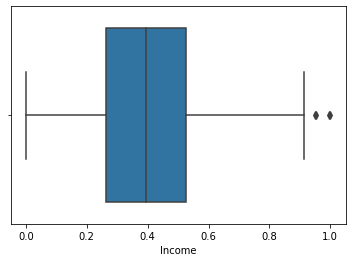

In [50]:
sns.boxplot(x='Income', data = df)
plt.show()

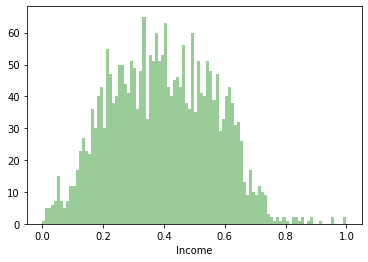

In [51]:
sns.distplot(a = df['Income'],kde = False, color="g", bins = 100)

This visualization is useful to check the presence of outliers but it is not precise enough for us to decide which ones to drop. So we opted to use IQR method.

In [52]:
print(dataset.shape)
dataset.drop(dataset[dataset.Income >= upper_bound_val].index, inplace=True)
print(dataset.shape)

(2498, 32)
(2494, 32)


### Recency - Outlier Analysis

In [53]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset
df.sort_values(by=['Recency'], inplace = True)
#sorted(dataset)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['Recency'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.23232323232323235
Quantile 1: 0.7575757575757577
Interquartile range: 0.5252525252525253
Lower bound: -0.5555555555555556
Upper bound: 1.5454545454545456


In [54]:
x = df['Recency']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: []


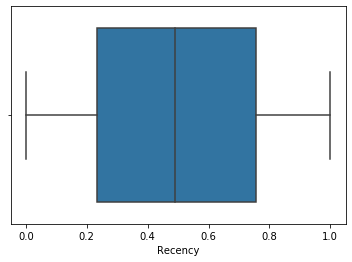

In [55]:
sns.boxplot(x='Recency', data = df)
plt.show()

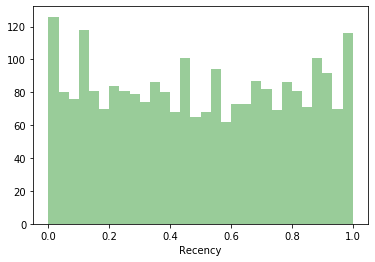

In [56]:
sns.distplot(a = df['Recency'],kde = False, color="g", bins = 30)

We can conclude that Recency variable has a uniform distribution without outliers.

### MntSneakers - Outlier Analysis

In [57]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset[dataset.MntSneakers != 0]
df.sort_values(by=['MntSneakers'], inplace = True)
#sorted(df)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['MntSneakers'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.016700066800267203
Quantile 1: 0.34368737474949906
Interquartile range: 0.32698730794923186
Lower bound: -0.4737808951235806
Upper bound: 0.8341683366733469


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
x = df['MntSneakers']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.8363393453573815, 0.8370073480293921, 0.8370073480293921, 0.8436873747494991, 0.852371409485638, 0.8590514362057449, 0.8597194388777556, 0.8603874415497663, 0.8617234468937877, 0.8623914495657984, 0.8697394789579159, 0.8750835003340014, 0.8777555110220442, 0.8810955243820976, 0.8837675350701404, 0.8871075484301938, 0.8897795591182366, 0.8951235804943221, 0.8951235804943221, 0.9011356045424183, 0.9104876419505679, 0.9111556446225786, 0.9131596526386107, 0.9311957247828992, 0.9385437541750168, 0.9478957915831664, 0.9505678022712092, 0.9532398129592519, 0.9612558450233801, 0.9672678690714763, 0.976619906479626, 0.976619906479626, 0.9799599198396794, 0.9832999331997329, 0.997995991983968, 1.0]


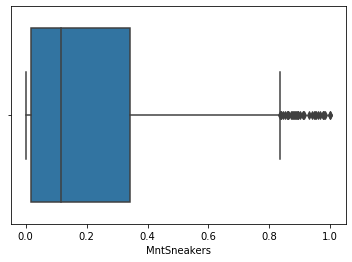

In [59]:
sns.boxplot(x='MntSneakers', data = df)
plt.show()

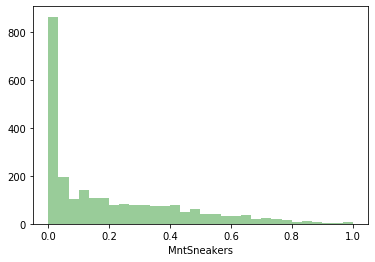

In [60]:
sns.distplot(a = df['MntSneakers'],kde = False, color="g", bins = 30)

### MntRackets - Outlier Analysis

In [61]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset[dataset.MntRackets != 0]
df.sort_values(by=['MntRackets'], inplace = True)


#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['MntRackets'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.01534356237491661
Quantile 1: 0.2221480987324883
Interquartile range: 0.2068045363575717
Lower bound: -0.29486324216144094
Upper bound: 0.5323549032688459


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
x = df['MntRackets']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.5336891260840559, 0.5343562374916611, 0.5356904603068712, 0.5356904603068712, 0.5356904603068712, 0.5363575717144763, 0.5363575717144763, 0.5376917945296864, 0.5396931287525016, 0.5396931287525016, 0.5396931287525016, 0.5443629086057371, 0.5463642428285523, 0.5476984656437625, 0.5483655770513676, 0.5496997998665777, 0.5496997998665777, 0.5517011340893929, 0.5523682454969979, 0.5523682454969979, 0.553702468312208, 0.5543695797198132, 0.5543695797198132, 0.5557038025350233, 0.5563709139426284, 0.5577051367578385, 0.5577051367578385, 0.5603735823882587, 0.5603735823882587, 0.5603735823882587, 0.5603735823882587, 0.5643762508338892, 0.5643762508338892, 0.5657104736490993, 0.5677118078719146, 0.5697131420947298, 0.5697131420947298, 0.571714476317545, 0.57238158772515, 0.5757171447631754, 0.5763842561707805, 0.5777184789859906, 0.5783855903935957, 0.5837224816544363, 0.5843895930620413, 0.5863909272848565, 0.5863909272848565, 0.5883922615076718, 0.590393595730487, 0.590393595730

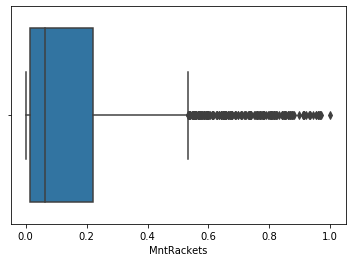

In [63]:
sns.boxplot(x='MntRackets', data = df)
plt.show()

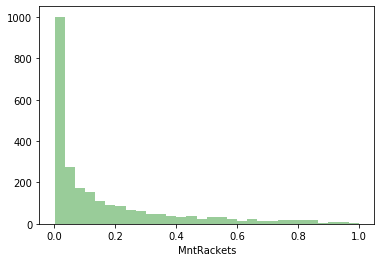

In [64]:
sns.distplot(a = df['MntRackets'],kde = False, color="g", bins = 30)

### MntTShirts - Outlier Analysis

In [65]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset[dataset.MntTShirts != 0]
df.sort_values(by=['MntTShirts'], inplace = True)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['MntTShirts'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.020066889632107024
Quantile 1: 0.21070234113712374
Interquartile range: 0.1906354515050167
Lower bound: -0.26588628762541805
Upper bound: 0.49665551839464883


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
x = df['MntTShirts']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.4983277591973244, 0.4983277591973244, 0.5083612040133779, 0.5083612040133779, 0.5083612040133779, 0.5117056856187291, 0.5117056856187291, 0.5117056856187291, 0.5183946488294314, 0.5183946488294314, 0.5217391304347826, 0.5284280936454849, 0.5284280936454849, 0.5284280936454849, 0.5317725752508361, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5418060200668896, 0.5418060200668896, 0.5518394648829431, 0.5585284280936454, 0.5585284280936454, 0.5585284280936454, 0.5618729096989966, 0.5618729096989966, 0.5618729096989966, 0.5618729096989966, 0.5719063545150501, 0.5719063545150501, 0.5719063545150501, 0.5719063545150501, 0.5719063545150501, 0.5719063545150501, 0.5719063545150501, 0.5785953177257525, 0.5785953177257525, 0.5785953177257525, 0.5785953177257525, 0.5785953177257525, 0.5785953177257525, 0.5785953

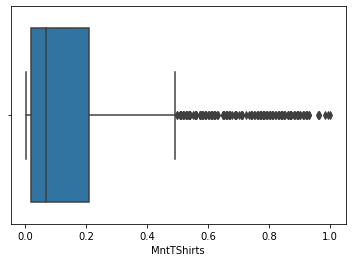

In [67]:
sns.boxplot(x='MntTShirts', data = df)
plt.show()

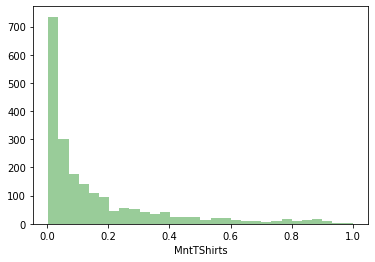

In [68]:
sns.distplot(a = df['MntTShirts'],kde = False, color="g", bins = 30)

### MntWatches - Outlier Analysis

In [69]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset[dataset.MntWatches != 0]
df.sort_values(by=['MntWatches'], inplace = True)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['MntWatches'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.02247191011235955
Quantile 1: 0.20224719101123595
Interquartile range: 0.1797752808988764
Lower bound: -0.24719101123595505
Upper bound: 0.47191011235955055


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
x = df['MntWatches']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.47191011235955055, 0.47191011235955055, 0.47191011235955055, 0.47191011235955055, 0.47191011235955055, 0.47191011235955055, 0.47191011235955055, 0.47752808988764045, 0.47752808988764045, 0.4831460674157303, 0.4831460674157303, 0.4887640449438202, 0.4887640449438202, 0.4887640449438202, 0.4887640449438202, 0.4943820224719101, 0.4943820224719101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5056179775280899, 0.5056179775280899, 0.5056179775280899, 0.5056179775280899, 0.5056179775280899, 0.5112359550561798, 0.5112359550561798, 0.5168539325842696, 0.5168539325842696, 0.5168539325842696, 0.5168539325842696, 0.5168539325842696, 0.5168539325842696, 0.5224719101123595, 0.5224719101123595, 0.5224719101123595, 0.5224719101123595, 0.5224719101123595, 0.5280898876404494, 0.5337078651685393, 0.5337078651685393, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.5449438202247191, 0.550

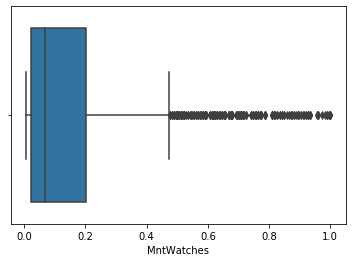

In [71]:
sns.boxplot(x='MntWatches', data = df)
plt.show()

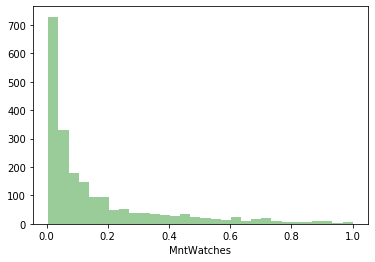

In [72]:
sns.distplot(a = df['MntWatches'],kde = False, color="g", bins = 30)

### MntHats - Outlier Analysis

In [73]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset[dataset.MntHats != 0]
df.sort_values(by=['MntHats'], inplace = True)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['MntHats'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.015037593984962405
Quantile 1: 0.16541353383458646
Interquartile range: 0.15037593984962405
Lower bound: -0.21052631578947367
Upper bound: 0.39097744360902253


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
x = df['MntHats']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.39473684210526316, 0.39473684210526316, 0.39473684210526316, 0.39473684210526316, 0.4022556390977443, 0.4022556390977443, 0.4022556390977443, 0.4022556390977443, 0.4022556390977443, 0.4022556390977443, 0.40601503759398494, 0.40601503759398494, 0.40601503759398494, 0.4172932330827067, 0.4172932330827067, 0.4172932330827067, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.424812030075188, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.4323308270676691, 0.4323308270676691, 0.4323308270676691, 0.4323308270676691, 0.4323308270676691, 0.43609022556390975, 0.44360902255639095, 0.44360902255639095, 0.4473684210526315, 0.45112781954887216, 0.45112781954887216, 0.45112781954887216, 0.4548872180451128, 0.4548872180451128, 0.45864661654135336, 0.45864661654135336, 0.45864661654135336, 0.46240601503759393, 0.46240601503759393, 0.46240601503759393, 0.46240601503759393, 0.46616541353383456, 0.46616541353383456, 0.47368421052631576, 

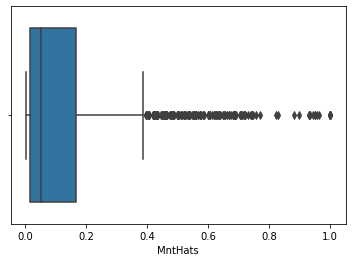

In [75]:
sns.boxplot(x='MntHats', data = df)
plt.show()

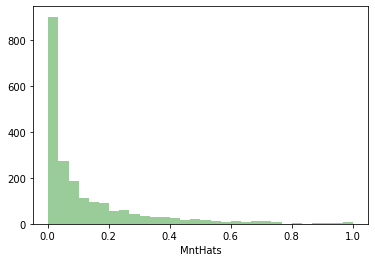

In [76]:
sns.distplot(a = df['MntHats'],kde = False, color="g", bins = 30)

### MntPremium_Brand - Outlier Analysis

In [77]:
#InterQuantile Range: 75% - 25% values in a dataset

# Steps:
#  1. Arrange the data in increasing order
df=dataset[dataset.MntPremium_Brand != 0]
df.sort_values(by=['MntPremium_Brand'], inplace = True)

#  2. Calculate first(q1) and third(q3)
quantile1, quantile3 = np.percentile(df['MntPremium_Brand'],[25,75])
print ('Quantile 1:', quantile1)
print ('Quantile 1:', quantile3)

#  3. Find interquartile range (q3-q1)
iqr_value = quantile3-quantile1
print ('Interquartile range:', iqr_value)

#  4. Find lower bound q1*1.5
lower_bound_val = quantile1 - (1.5 * iqr_value)

#  5. Find upper bound q3*1.5
upper_bound_val = quantile3 + (1.5 * iqr_value)
print('Lower bound:', lower_bound_val)
print('Upper bound:', upper_bound_val)

# Anything that left outside of lower and upper bound is an outlier

Quantile 1: 0.026143790849673207
Quantile 1: 0.16993464052287582
Interquartile range: 0.1437908496732026
Lower bound: -0.1895424836601307
Upper bound: 0.3856209150326797


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
x = df['MntPremium_Brand']
Outliers = [i for i in x if i >= upper_bound_val] # As the Lower bound is negative, we only need to check outliers above Upper bound
print ('Outliers:', Outliers)

Outliers: [0.38562091503267976, 0.38562091503267976, 0.3899782135076253, 0.3899782135076253, 0.3899782135076253, 0.3899782135076253, 0.3899782135076253, 0.3899782135076253, 0.3921568627450981, 0.3921568627450981, 0.3921568627450981, 0.3921568627450981, 0.3921568627450981, 0.39433551198257083, 0.3965141612200436, 0.3965141612200436, 0.3965141612200436, 0.40087145969498916, 0.40087145969498916, 0.40087145969498916, 0.40087145969498916, 0.40087145969498916, 0.4030501089324619, 0.4052287581699347, 0.4052287581699347, 0.4052287581699347, 0.40958605664488024, 0.40958605664488024, 0.411764705882353, 0.411764705882353, 0.411764705882353, 0.4139433551198258, 0.4183006535947713, 0.4183006535947713, 0.4183006535947713, 0.4183006535947713, 0.4183006535947713, 0.4183006535947713, 0.42047930283224405, 0.42047930283224405, 0.4226579520697168, 0.4226579520697168, 0.4248366013071896, 0.4248366013071896, 0.4291938997821351, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.433551198257080

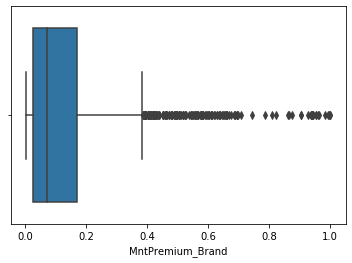

In [79]:
sns.boxplot(x='MntPremium_Brand', data = df)
plt.show()

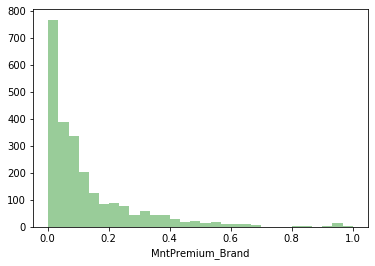

In [80]:
sns.distplot(a = df['MntPremium_Brand'],kde = False, color="g", bins = 30)

### Conclusions about outlier analysis:

<p style="text-align: justify">During our Outliers' Analysis we have found many outliers in each of the Amounts categories. We have opted to nor discard them for two reasons: our database would be recuded to 3/5 of its original size and we could lose important information, we have done a quick compared analysis and, without the outliers our results would be similar, and, finally, because we are analysing buying habits of different people and these can vary imensly.<p/>

### Checking outliers comparing several variables

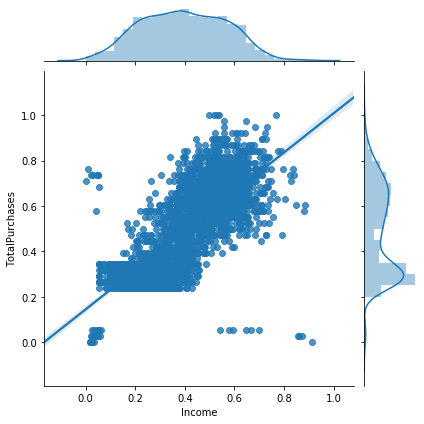

In [81]:
sns.jointplot(x='Income', y='TotalPurchases', data = dataset, kind='reg') #regression line

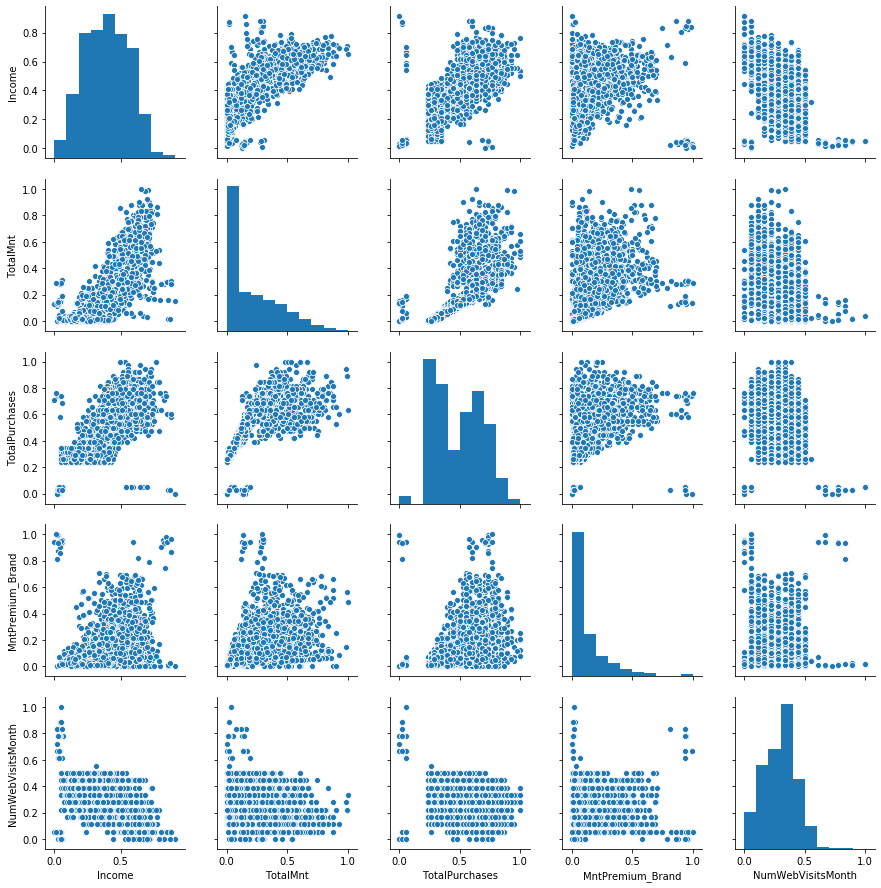

In [82]:
sns.pairplot(dataset[['Income', 'TotalMnt', 'TotalPurchases', 'MntPremium_Brand', 'NumWebVisitsMonth']])

From the plots above we can infer some hypothesis that we will study later, for example, we can infer that the higher the income the higher the amount spent.

We can also verify that, no matter the variables pair we are studying there are always some outliers that will need to be taken care of.

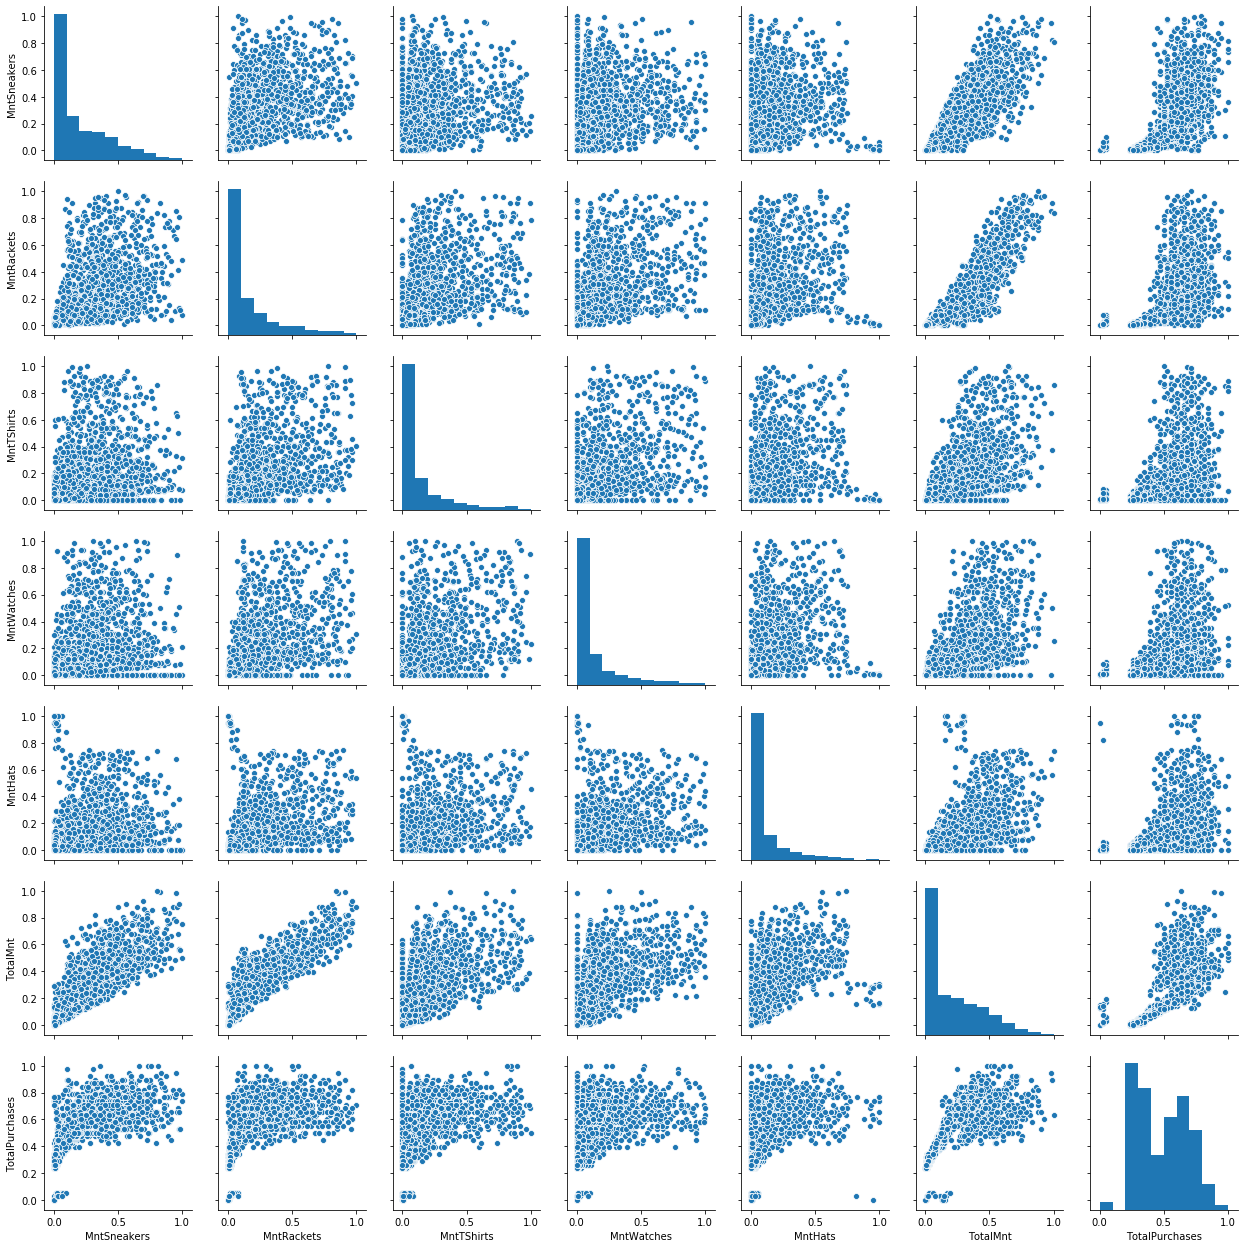

In [83]:
sns.pairplot(dataset[['MntSneakers', 'MntRackets', 'MntTShirts', 'MntWatches', 'MntHats', 'TotalMnt', 'TotalPurchases']])

By these group of plots we can infer that snickers and rackets are the categories that influence the most the amount spent, and that the more purchases one do the more amount they spend.

We can also observe that the main outliers visible are when we relate the total purchases with any of the other columns.

## Going further with Data Visualization

One good way to know in which direction we should go during our analysis is to create a correlation map and to discover which variables have an "a priori" relation.

In [84]:
corr= dataset.corr(method = 'pearson')
corr

Income   Kidhome  Teenhome   Recency  MntSneakers  \
Income               1.000000 -0.501443  0.020164 -0.002631     0.693177   
Kidhome             -0.501443  1.000000 -0.070097  0.008284    -0.475230   
Teenhome             0.020164 -0.070097  1.000000 -0.023550    -0.021769   
Recency             -0.002631  0.008284 -0.023550  1.000000     0.011619   
MntSneakers          0.693177 -0.475230 -0.021769  0.011619     1.000000   
MntTShirts           0.509993 -0.356812 -0.192346 -0.005956     0.410302   
MntRackets           0.678132 -0.433554 -0.275664 -0.009121     0.626719   
MntWatches           0.514381 -0.346326 -0.192871 -0.027651     0.410210   
MntHats              0.538812 -0.326994 -0.182179  0.004418     0.334409   
MntPremium_Brand     0.310976 -0.261512 -0.025288  0.003505     0.282238   
NumDealsPurchases   -0.098022  0.249843  0.395359 -0.018596     0.041299   
NumWebPurchases      0.449081 -0.285453  0.126302  0.004773     0.449298   
NumCatalogPurchases  0.684254 -0.470161 -0.137526  0.004780     0.685735   
NumStorePurchases    0.631741 -0.471859 -0.000195 -0.006691     0.659693   
NumWebVisitsMonth   -0.634631  0.435814  0.146676 -0.001265    -0.297479   
AcceptedCmp2         0.000140  0.047779 -0.023185  0.004502     0.049668   
AcceptedCmp3         0.210267 -0.157257  0.041992  0.013951     0.332682   
AcceptedCmp4         0.417898 -0.229422 -0.202301  0.034086     0.466814   
AcceptedCmp5         0.304513 -0.192696 -0.135660  0.035087     0.338898   
AcceptedCmp1         0.111183 -0.078207  0.006975 -0.012770     0.180633   
Complain            -0.017463  0.026761  0.017779 -0.014943    -0.008408   
DepVar               0.114686 -0.060861 -0.133247  0.022894     0.212721   
Age                  0.221620 -0.250715  0.373403 -0.040932     0.161197   
TimeAsCustomer       0.002842  0.001954  0.030115  0.019125     0.178889   
TotalCampaigns       0.377209 -0.216027 -0.123352  0.031356     0.486632   
PremBrandFan        -0.153412  0.002163  0.014726  0.003134    -0.063062   
TotalMnt             0.784484 -0.524086 -0.181440  0.000425     0.862872   
TotalPurchases       0.741214 -0.515940  0.005663  0.000905     0.754471   
HighEducation        0.210936 -0.078023  0.135492 -0.011188     0.182760   
MaritalStatusLabel  -0.021431 -0.020036 -0.014787 -0.012134    -0.007467   

                     MntTShirts  MntRackets  MntWatches   MntHats  \
Income                 0.509993    0.678132    0.514381  0.538812   
Kidhome               -0.356812   -0.433554   -0.346326 -0.326994   
Teenhome              -0.192346   -0.275664   -0.192871 -0.182179   
Recency               -0.005956   -0.009121   -0.027651  0.004418   
MntSneakers            0.410302    0.626719    0.410210  0.334409   
MntTShirts             1.000000    0.586187    0.572266  0.488337   
MntRackets             0.586187    1.000000    0.598091  0.495547   
MntWatches             0.572266    0.598091    1.000000  0.494065   
MntHats                0.488337    0.495547    0.494065  1.000000   
MntPremium_Brand       0.308886    0.291509    0.297928  0.423870   
NumDealsPurchases     -0.119750   -0.166423   -0.111931 -0.182217   
NumWebPurchases        0.235178    0.263504    0.219526  0.441405   
NumCatalogPurchases    0.534840    0.703805    0.544137  0.402376   
NumStorePurchases      0.471721    0.549874    0.434348  0.325282   
NumWebVisitsMonth     -0.391608   -0.500639   -0.402989 -0.448812   
AcceptedCmp2          -0.007701    0.023063   -0.022947  0.002970   
AcceptedCmp3           0.037012    0.105349    0.025528  0.014911   
AcceptedCmp4           0.273337    0.433584    0.269601  0.250566   
AcceptedCmp5           0.186768    0.331827    0.184629  0.197173   
AcceptedCmp1           0.018778    0.079328    0.036703  0.005254   
Complain              -0.034936   -0.022361   -0.028149 -0.009245   
DepVar                 0.074746    0.138656    0.079346  0.120489   
Age                    0.054147    0.049739    0.037844  0.063928   
TimeAsCust

Creating a heatmap is a easier way to analyse the correlations as the higher correlations (positive or negative) will have stronger colours.

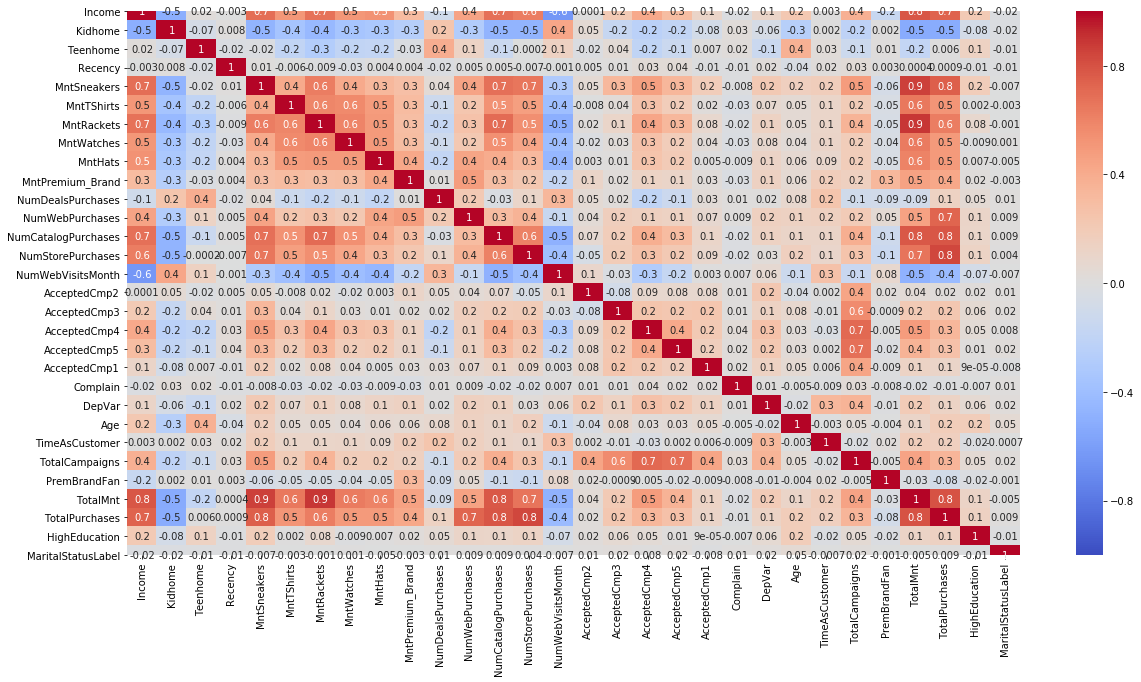

In [85]:
figure = plt.figure(figsize=(20,10))


sns.heatmap(corr, annot=True, fmt = '.1g',vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm') # fmt='.1g' give us the first meaning value in a decimal value ex: 0,0032 -> '0,003'

### Heatmap Analysis
<p style="text-align: justify">From the heat map above we can deduce some hypothesis that are worth be studied:</p>
    <p style="text-align: justify">- Are the Rackets and Snickers (with 0.9 correlations each) the categories in which customers spend more money in and that contribute the most for the Total Amount?</p>
    <p style="text-align: justify">- The higher the income the more money the customer spend (0,8 correlations)?</p>
    <p style="text-align: justify">- The customers with higher income prefer to purchase through catalog (0,7 relation) and do not buy through internet (negative correlation of 0,6)?</p>
    
<p style="text-align: justify">These hypothesis are coherent with the one we infered from the plots above.</p>

<p style="text-align: justify">We can also conclude from the heat map that there are some variables without correlations between them and that is why we will not consider them in our clustering evaluation.</p>


## Clusters and Customer Segmentation

<p style="text-align: justify">After the pre-processing phase our data is ready to be analysed.Our purpose is to develop some insights about the LaGoste customers, as well as find relevant client segmentations to serve the marketing department with useful information.</p>

<p style="text-align: justify">To do this we will try to find clusters by defining variables accordingly with some perspectives, applying cluster analysis algorithms to find groups of individuals with similar characteristics and validating the results.</p>

### Customer Segmentation by Loyalty and Value

#### Create a RFM Modelling scores for each customer
RFM stands for Recency (Number of days since last purchase ), Frequency (Number of purchases) and Monetary (Total amount spent). It is a behaviour-based method for grouping customers into segments using the mentioned metrics. This approach helps to identify potential customer segments to further design specific marketing strategies for each one increasing the engagement and, consequently, increasing profits.

A new data frame will be created with the required data for the modeling:

In [86]:
RFMScores = dataset[['Recency', 'TotalPurchases', 'TotalMnt']]
RFMScores.head()

Recency  TotalPurchases  TotalMnt
Custid                                     
70012576      0.0        0.526316  0.486694
70034556      0.0        0.526316  0.348906
70021396      0.0        0.289474  0.015080
70035464      0.0        0.315789  0.028977
70008640      0.0        0.578947  0.408338

In [87]:
RFMScores.describe()

Recency  TotalPurchases     TotalMnt
count  2494.000000     2494.000000  2494.000000
mean      0.494949        0.486146     0.212118
std       0.300914        0.194991     0.214471
min       0.000000        0.000000     0.000591
25%       0.232323        0.315789     0.023655
50%       0.489899        0.473684     0.134979
75%       0.757576        0.657895     0.357776
max       1.000000        1.000000     1.000000

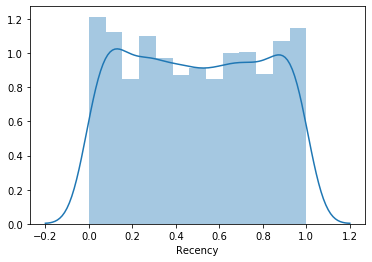

In [88]:
sns.distplot(dataset['Recency'])

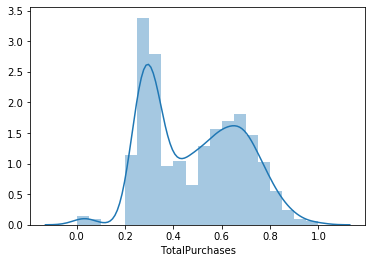

In [89]:
sns.distplot(dataset['TotalPurchases'])

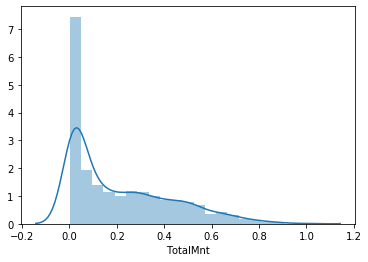

In [90]:
sns.distplot(RFMScores['TotalMnt'])

#### Computing the Quartiles of RFM values

Splitting RFMScores into quartiles:

In [91]:
quantiles = RFMScores.quantile(q=[0.25,0.50,0.75])
quantiles

Recency  TotalPurchases  TotalMnt
0.25  0.232323        0.315789  0.023655
0.50  0.489899        0.473684  0.134979
0.75  0.757576        0.657895  0.357776

In [92]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 0.23232323232323235,
  0.5: 0.48989898989898994,
  0.75: 0.7575757575757577},
 'TotalPurchases': {0.25: 0.3157894736842105,
  0.5: 0.4736842105263158,
  0.75: 0.6578947368421052},
 'TotalMnt': {0.25: 0.023654642223536373,
  0.5: 0.1349793021880544,
  0.75: 0.35777646363098764}}

These functions will assign a score value to R, F and M variables. 

We should have in mind that the bigger the Recency is, the worse is the score. In the other hand, the bigger TotalMnt and TotalPurchases are, the better is the score.

Arguments (x = value, p = recency(Recency), monetary_value(TotalPurchases), frequency(TotalMnt), d = quartiles dict).

In [93]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

Adding R, F and M columns to RFMScores,

In [94]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency', quantiles,))
RFMScores['F'] = RFMScores['TotalPurchases'].apply(FnMScoring, args=('TotalPurchases', quantiles,))
RFMScores['M'] = RFMScores['TotalMnt'].apply(FnMScoring, args=('TotalMnt', quantiles,))
RFMScores.head()

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Recency  TotalPurchases  TotalMnt  R  F  M
Custid                                              
70012576      0.0        0.526316  0.486694  1  2  1
70034556      0.0        0.526316  0.348906  1  2  2
70021396      0.0        0.289474  0.015080  1  4  4
70035464      0.0        0.315789  0.028977  1  4  3
70008640      0.0        0.578947  0.408338  1  2  1

In the next step we will concatenate R, F and M scores to the same column and then create a new one (RFMScore) to sum those values.

In [95]:
# Concatenate RFM scores
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

# Add RFMScore column to show the total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Recency  TotalPurchases  TotalMnt  R  F  M RFMGroup  RFMScore
Custid                                                                 
70012576      0.0        0.526316  0.486694  1  2  1      121         4
70034556      0.0        0.526316  0.348906  1  2  2      122         5
70021396      0.0        0.289474  0.015080  1  4  4      144         9
70035464      0.0        0.315789  0.028977  1  4  3      143         8
70008640      0.0        0.578947  0.408338  1  2  1      121         4

In [96]:
RFMScores.describe()

Recency  TotalPurchases     TotalMnt            R            F  \
count  2494.000000     2494.000000  2494.000000  2494.000000  2494.000000   
mean      0.494949        0.486146     0.212118     2.492783     2.613472   
std       0.300914        0.194991     0.214471     1.120027     1.147974   
min       0.000000        0.000000     0.000591     1.000000     1.000000   
25%       0.232323        0.315789     0.023655     1.000000     2.000000   
50%       0.489899        0.473684     0.134979     2.500000     3.000000   
75%       0.757576        0.657895     0.357776     3.000000     4.000000   
max       1.000000        1.000000     1.000000     4.000000     4.000000   

                 M     RFMScore  
count  2494.000000  2494.000000  
mean      2.502406     7.608661  
std       1.120048     2.454892  
min       1.000000     3.000000  
25%       2.000000     6.000000  
50%       2.500000     8.000000  
75%       4.000000    10.000000  
max       4.000000    12.000000

Next, we will count the company customers by the different levels of Loyalty for the RFM analysis aiming to have a simplistic view of what is about to be analysed. Here we can have a look based on each sobre by R, F and M.

In [97]:
print("Best Customers: ",len(RFMScores[RFMScores['RFMGroup']=='111'])
                       + len(RFMScores[RFMScores['RFMGroup']=='122']))
print('High-spending New Customers: ',len(RFMScores[RFMScores['RFMGroup']=='141'])
                                    + len(RFMScores[RFMScores['RFMGroup']=='142']))
print('Lowest-Spending Active Loyal Customers: ',len(RFMScores[RFMScores['RFMGroup']=='113'])
                                               + len(RFMScores[RFMScores['RFMGroup']=='114']))
print('Churned Best Customers: ',len(RFMScores[RFMScores['RFMGroup']=='411'])
                               + len(RFMScores[RFMScores['RFMGroup']=='422']))
print('Loyal Customers: ',len(RFMScores[RFMScores['F']==1]))
print("Big Spenders: ",len(RFMScores[RFMScores['M']==1]))

Best Customers:  168
High-spending New Customers:  1
Lowest-Spending Active Loyal Customers:  0
Churned Best Customers:  181
Loyal Customers:  545
Big Spenders:  623


Now we are ready to assign a loyalty level to each customer where the best ones are Platinum and the worse Bronze.

In [98]:
LoyaltyLevel = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = LoyaltyLevel)
RFMScores['RFMLoyaltyLevel'] = Score_cuts.values
RFMScores.reset_index().head()

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Custid  Recency  TotalPurchases  TotalMnt  R  F  M RFMGroup  RFMScore  \
0  70012576      0.0        0.526316  0.486694  1  2  1      121         4   
1  70034556      0.0        0.526316  0.348906  1  2  2      122         5   
2  70021396      0.0        0.289474  0.015080  1  4  4      144         9   
3  70035464      0.0        0.315789  0.028977  1  4  3      143         8   
4  70008640      0.0        0.578947  0.408338  1  2  1      121         4   

  RFMLoyaltyLevel  
0        Platinum  
1        Platinum  
2          Silver  
3            Gold  
4        Platinum

In [99]:
# Just a validation with the RFMScore == Platinium example
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('TotalMnt', ascending=False).reset_index().head(20)

Custid   Recency  TotalPurchases  TotalMnt  R  F  M RFMGroup  RFMScore  \
0   70006500  0.010101        0.894737  0.991130  1  1  1      111         3   
1   70031372  0.171717        0.947368  0.981668  1  1  1      111         3   
2   70006952  0.030303        0.815789  0.863099  1  1  1      111         3   
3   70012900  0.161616        0.815789  0.840627  1  1  1      111         3   
4   70011340  0.010101        0.894737  0.822886  1  1  1      111         3   
5   70034896  0.171717        0.710526  0.808693  1  1  1      111         3   
6   70041684  0.010101        0.736842  0.794205  1  1  1      111         3   
7   70016532  0.060606        0.736842  0.769663  1  1  1      111         3   
8   70035600  0.161616        0.736842  0.750444  1  1  1      111         3   
9   70026532  0.202020        0.710526  0.718805  1  1  1      111         3   
10  70013304  0.101010        0.710526  0.711709  1  1  1      111         3   
11  70036564  0.161616        0.684211  0.683915  1  1  1      111         3   
12  70022872  0.080808        0.842105  0.683323  1  1  1      111         3   
13  70005204  0.212121        0.684211  0.681254  1  1  1      111         3   
14  70005424  0.080808        0.684211  0.679775  1  1  1      111         3   
15  70014756  0.020202        0.894737  0.669426  1  1  1      111         3   
16  70040204  0.010101        0.710526  0.662330  1  1  1      111         3   
17  70015820  0.202020        0.789474  0.654051  1  1  1      111         3   
18  70036788  0.151515        0.763158  0.646659  1  1  1      111         3   
19  70030304  0.010101        0.815789  0.637788  1  1  1      111         3   

   RFMLoyaltyLevel  
0         Platinum  
1         Platinum  
2         Platinum  
3         Platinum  
4         Platinum  
5         Platinum  
6         Platinum  
7         Platinum  
8         Platinum  
9         Platinum  
10        Platinum  
11        Platinum  
12        Platinum  
13        Platinum  
14        Platinum  
15        Platinum  
16        Platinum  
17        Platinum  
18        Platinum  
19        Platinum

#### RFM Model data visualization

In [100]:
import chart_studio.plotly as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [101]:
# Plot for TotalPurchases Vs TotalMnt
graph = RFMScores.query("TotalMnt < 3000 and TotalPurchases < 500")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Bronze'")['TotalPurchases'],
        y=graph.query("RFMLoyaltyLevel == 'Bronze'")['TotalMnt'],
    mode='markers',
    name='Bronze',
    marker=dict(size=7, line=dict(width=1), color='maroon', opacity=0.8)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Silver'")['TotalPurchases'],
        y=graph.query("RFMLoyaltyLevel == 'Silver'")['TotalMnt'],
    mode='markers',
    name='Silver',
    marker=dict(size=9, line=dict(width=1), color='silver', opacity=0.5)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Gold'")['TotalPurchases'],
        y=graph.query("RFMLoyaltyLevel == 'Gold'")['TotalMnt'],
    mode='markers',
    name='Gold',
    marker=dict(size=11, line=dict(width=1), color='gold', opacity=0.9)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Platinum'")['TotalPurchases'],
        y=graph.query("RFMLoyaltyLevel == 'Platinum'")['TotalMnt'],
    mode='markers',
    name='Platinum',
    marker=dict(size=11, line=dict(width=1), color='lightsteelblue', opacity=0.9)
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title':'TotalMnt'},
        xaxis= {'title':'TotalPurchases'},
        title= 'Segments')

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

# Plot for Recency Vs TotalPurchases
graph = RFMScores.query("Recency < 100 and TotalPurchases < 500")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Bronze'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Bronze'")['TotalPurchases'],
    mode='markers',
    name='Bronze',
    marker=dict(size=7, line=dict(width=1), color='maroon', opacity=0.8)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Silver'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Silver'")['TotalPurchases'],
    mode='markers',
    name='Silver',
    marker=dict(size=9, line=dict(width=1), color='silver', opacity=0.5)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Gold'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Gold'")['TotalPurchases'],
    mode='markers',
    name='Gold',
    marker=dict(size=11, line=dict(width=1), color='gold', opacity=0.9)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Platinum'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Platinum'")['TotalPurchases'],
    mode='markers',
    name='Platinum',
    marker=dict(size=11, line=dict(width=1), color='lightsteelblue', opacity=0.9)
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title':'TotalPurchases'},
        xaxis= {'title':'Recency'},
        title= 'Segments')

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

# Plot for Recency Vs TotalMnt
graph = RFMScores.query("Recency < 100 and TotalPurchases < 500")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Bronze'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Bronze'")['TotalMnt'],
    mode='markers',
    name='Bronze',
    marker=dict(size=7, line=dict(width=1), color='maroon', opacity=0.8)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Silver'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Silver'")['TotalMnt'],
    mode='markers',
    name='Silver',
    marker=dict(size=9, line=dict(width=1), color='silver', opacity=0.5)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Gold'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Gold'")['TotalMnt'],
    mode='markers',
    name='Gold',
    marker=dict(size=11, line=dict(width=1), color='gold', opacity=0.9)
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyaltyLevel == 'Platinum'")['Recency'],
        y=graph.query("RFMLoyaltyLevel == 'Platinum'")['TotalMnt'],
    mode='markers',
    name='Platinum',
    marker=dict(size=11, line=dict(width=1), color='lightsteelblue', opacity=0.9)
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title':'TotalMnt'},
        xaxis= {'title':'Recency'},
        title= 'Segments')

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

<p style="text-align: justify">These are the groups of customers based on the RFM modeling with a loyalty label associated. By the human eye it is visible that they were grouped by clusters. However, we want to go further and analyze them based on the K-means clustering. With the next analysis we hope to have more detailed information per clusters and, perhaps, if it is also possible to have more clusters for a better segmentation.</p>

### K-means Clustering

In [102]:
# Handle negative and zero values
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
    
# Apply handle_neg_n_zero function
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['TotalMnt'] = [handle_neg_n_zero(x) for x in RFMScores.TotalMnt]
RFMScores['TotalPurchases'] = [handle_neg_n_zero(x) for x in RFMScores.TotalPurchases]

# Perform log transformation to bring data into a near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'TotalPurchases', 'TotalMnt']].apply(np.log, axis = 1).round(3)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

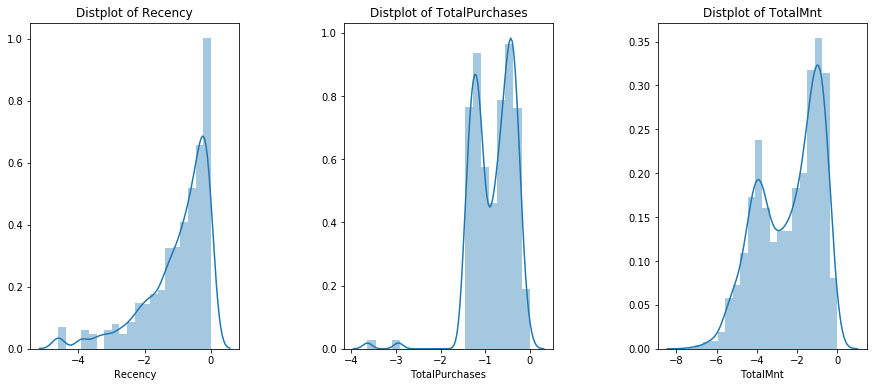

In [103]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Recency' , 'TotalPurchases' , 'TotalMnt']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(Log_Tfd_Data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [104]:
from sklearn.preprocessing import StandardScaler

# Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

# Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)
Scaled_Data

Recency  TotalPurchases  TotalMnt
Custid                                      
70012576  1.008761        0.357546  1.081557
70034556  1.008761        0.357546  0.863974
70021396  1.008761       -0.910358 -1.188354
70035464  1.008761       -0.725897 -0.761684
70008640  1.008761        0.558969  0.966558
...            ...             ...       ...
70011384  1.008761        1.544881  1.327888
70034628  1.008761        0.558969  0.381765
70024144  1.008761        0.993619  1.265815
70017808  1.008761        0.743430  0.619603
70023072  1.008761       -1.111781 -2.190669

[2494 rows x 3 columns]

Before applying the k-means algorithm let's observe how many clusters do the Elbow method suggest,

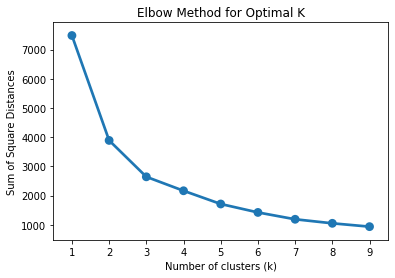

In [105]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters=k, init= 'k-means++', max_iter=1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
# Plot the graph for the sum of square distance values and the number of possible clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

We can see that, by the elbow method, we are suggested to group our information 2 or 3 clusters

In [106]:
Model = KMeans(n_clusters=3,       # Number of clusters;
               init= 'k-means++',  # Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence;
               max_iter= 1000)     # Maximum number of iterations of the k-means algorithm for a single run;

Model.fit_predict(Scaled_Data)     # Compute k-means clustering.

RFMScores['Cluster'] = Model.fit_predict(Scaled_Data)
RFMScores.head(10)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency  TotalPurchases  TotalMnt  R  F  M RFMGroup  RFMScore  \
Custid                                                                    
70012576      1.0        0.526316  0.486694  1  2  1      121         4   
70034556      1.0        0.526316  0.348906  1  2  2      122         5   
70021396      1.0        0.289474  0.015080  1  4  4      144         9   
70035464      1.0        0.315789  0.028977  1  4  3      143         8   
70008640      1.0        0.578947  0.408338  1  2  1      121         4   
70008448      1.0        0.500000  0.333826  1  2  2      122         5   
70009296      1.0        0.342105  0.042874  1  3  3      133         7   
70042972      1.0        0.526316  0.368717  1  2  1      121         4   
70004636      1.0        0.236842  0.007688  1  4  4      144         9   
70011904      1.0        0.289474  0.019515  1  4  4      144         9   

         RFMLoyaltyLevel  Cluster  
Custid                             
70012576        Platinum        1  
70034556        Platinum        1  
70021396          Silver        0  
70035464            Gold        0  
70008640        Platinum        1  
70008448        Platinum        1  
70009296            Gold        0  
70042972        Platinum        1  
70004636          Silver        0  
70011904          Silver        0

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



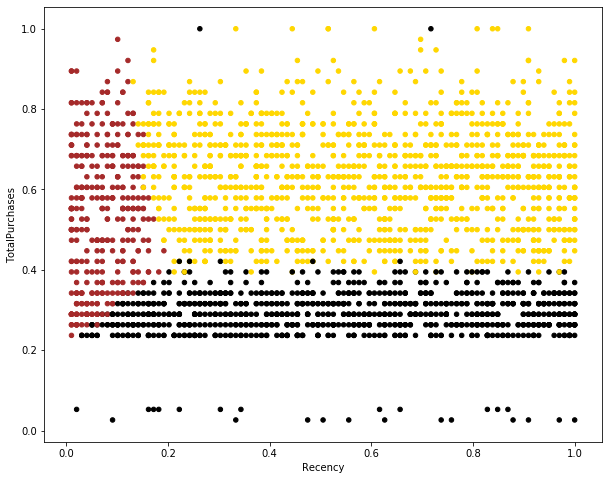

In [107]:
from matplotlib import pyplot as plt

# Scatter Plot TotalPurchases VS Recency
Colors = ['black', 'gold', 'brown', 'silver', 'red', 'blue']               #Set of colors to be used
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])         #Assign colors to the clusters
RFMScores.plot(kind = 'scatter', x='Recency', y='TotalPurchases', figsize=(10,8), c=RFMScores['Color'], legend=True)

In [108]:
pd.set_option('max_columns', None)
RFMScores.groupby('Color').describe()

Recency                                                              \
        count      mean       std       min       25%       50%       75%   
Color                                                                       
black   954.0  0.548610  0.278081  0.020202  0.303030  0.545455  0.797980   
brown   344.0  0.071089  0.045816  0.010101  0.030303  0.070707  0.111111   
gold   1196.0  0.593291  0.251258  0.131313  0.373737  0.606061  0.818182   

                TotalPurchases                                          \
            max          count      mean       std       min       25%   
Color                                                                    
black  1.000000          954.0  0.291846  0.066939  0.026316  0.263158   
brown  0.191919          344.0  0.535419  0.170592  0.236842  0.388158   
gold   1.000000         1196.0  0.631975  0.124143  0.394737  0.526316   

                                    TotalMnt                                \
            50%       75%       max    count      mean       std       min   
Color                                                                        
black  0.289474  0.315789  1.000000    954.0  0.025368  0.021452  0.000591   
brown  0.552632  0.684211  0.973684    344.0  0.258631  0.219548  0.005914   
gold   0.631579  0.710526  1.000000   1196.0  0.347702  0.186803  0.068007   

                                                    R                      \
            25%       50%       75%       max   count      mean       std   
Color                                                                       
black  0.011014  0.018924  0.033412  0.190716   954.0  2.639413  1.072384   
brown  0.068155  0.186576  0.413069  0.991130   344.0  1.000000  0.000000   
gold   0.194486  0.317120  0.475754  1.000000  1196.0  2.805184  0.971393   

                                     F                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
Color                                                                       
black  1.0  2.0  3.0  4.0  4.0   954.0  3.784067  0.411684  3.0  4.0  4.0   
brown  1.0  1.0  1.0  1.0  1.0   344.0  2.293605  1.009208  1.0  1.0  2.0   
gold   1.0  2.0  3.0  4.0  4.0  1196.0  1.771739  0.699483  1.0  1.0  2.0   

                      M                                              RFMScore  \
       75%  max   count      mean       std  min  25%  50%  75%  max    count   
Color                                                                           
black  4.0  4.0   954.0  3.615304  0.497440  2.0  3.0  4.0  4.0  4.0    954.0   
brown  3.0  4.0   344.0  2.203488  0.998185  1.0  1.0  2.0  3.0  4.0    344.0   
gold   2.0  4.0  1196.0  1.700669  0.689939  1.0  1.0  2.0  2.0  3.0   1196.0   

                                                       Cluster                 \
            mean       std  min  25%   50%   75%   max   count mean  std  min   
Color                                                                           
black  10.038784  1.266886  7.0  9.0  10.0  11.0  12.0   954.0  0.0  0.0  0.0   
brown   5.497093  1.910533  3.0  4.0   5.0   7.0   9.0   344.0  2.0  0.0  2.0   
gold    6.277592  1.572738  3.0  5.0   6.0   7.0  11.0  1196.0  1.0  0.0  1.0   

                           
       25%  50%  75%  max  
Color                      
black  0.0  0.0  0.0  0.0  
brown  2.0  2.0  2.0  2.0  
gold   1.0  1.0  1.0  1.0

We can clearly see that there are three different clusters with different characteristics:
- The black cluster is composed by the best customers: low recency, high number of purchases and high amount spent;
- The gold cluster have the most loyal customers that besides having bigger recency than the best customers, have high number of purchases and high amount spent;
- And the last, the brown one has a identical recency to the loyal clients but they have less number of purchases and less amount spent.

Besides having information about each cluster and their own characteristics this analysis seems to be superficial and general, without having a deep understanding about La Goste clients. Also, the RFM model allows us to characterize the customer base in more segments with more specific characteristics. 

We will group our information in 6 clusters (k=6). We know that the Elbow method finds the optimal K, but we believe that with more clusters we can retrieve more and detailed information about the clients.

In [109]:
Model = KMeans(n_clusters=6,       # Number of clusters;
               init= 'k-means++',  # Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence;
               max_iter= 1000)     # Maximum number of iterations of the k-means algorithm for a single run;

Model.fit_predict(Scaled_Data)     # Compute k-means clustering.

RFMScores['Cluster'] = Model.fit_predict(Scaled_Data)
RFMScores.head(10)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency  TotalPurchases  TotalMnt  R  F  M RFMGroup  RFMScore  \
Custid                                                                    
70012576      1.0        0.526316  0.486694  1  2  1      121         4   
70034556      1.0        0.526316  0.348906  1  2  2      122         5   
70021396      1.0        0.289474  0.015080  1  4  4      144         9   
70035464      1.0        0.315789  0.028977  1  4  3      143         8   
70008640      1.0        0.578947  0.408338  1  2  1      121         4   
70008448      1.0        0.500000  0.333826  1  2  2      122         5   
70009296      1.0        0.342105  0.042874  1  3  3      133         7   
70042972      1.0        0.526316  0.368717  1  2  1      121         4   
70004636      1.0        0.236842  0.007688  1  4  4      144         9   
70011904      1.0        0.289474  0.019515  1  4  4      144         9   

         RFMLoyaltyLevel  Cluster  Color  
Custid                                    
70012576        Platinum        1   gold  
70034556        Platinum        1   gold  
70021396          Silver        3  black  
70035464            Gold        3  black  
70008640        Platinum        1   gold  
70008448        Platinum        1   gold  
70009296            Gold        0  black  
70042972        Platinum        1   gold  
70004636          Silver        3  black  
70011904          Silver        3  black

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



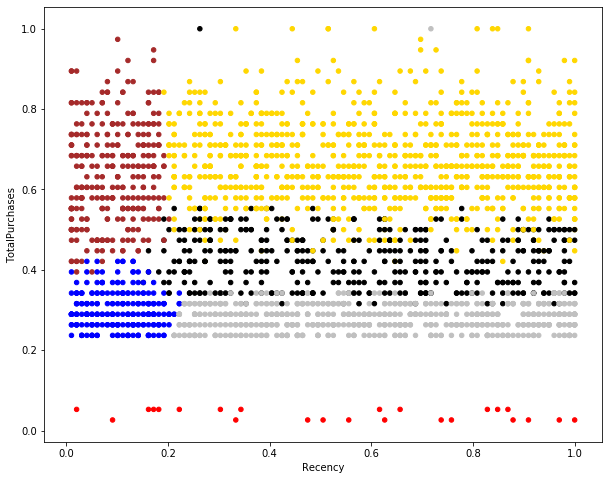

In [110]:
# Scatter Plot TotalPurchases VS Recency
Colors = ['black', 'gold', 'brown', 'silver', 'red', 'blue']
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
RFMScores.plot(kind = 'scatter', x='Recency', y='TotalPurchases', figsize=(10,8), c=RFMScores['Color'], legend=True)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



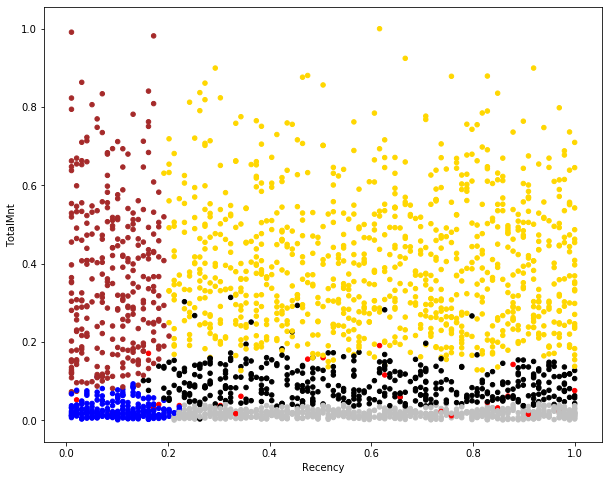

In [111]:
# Scatter Plot TotalPurchases VS Recency
Colors = ['black', 'gold', 'brown', 'silver', 'red', 'blue']
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
RFMScores.plot(kind = 'scatter', x='Recency', y='TotalMnt', figsize=(10,8), c=RFMScores['Color'], legend=True)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



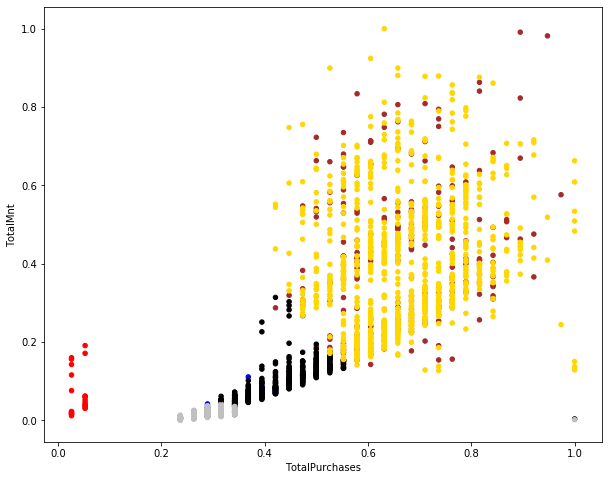

In [112]:
# Scatter Plot TotalPurchases VS Recency
Colors = ['black', 'gold', 'brown', 'silver', 'red', 'blue']
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
RFMScores.plot(kind = 'scatter', x='TotalPurchases', y='TotalMnt', figsize=(10,8), c=RFMScores['Color'], legend=True)

#### Data visualization with 3D Graphic

In [113]:
labels3 = Model.labels_
centroids3 = Model.cluster_centers_
df_cli = RFMScores[['Recency', 'TotalPurchases', 'TotalMnt', 'Cluster']]

In [114]:
import plotly as py
import plotly.graph_objs as go 

df_cli['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df_cli['Recency'],
    y= df_cli['TotalPurchases'],
    z= df_cli['TotalMnt'],
    mode='markers',
     marker=dict(
        color = df_cli['label3'], 
        size= 5,
        line=dict(
            color= df_cli['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Recency'),
            yaxis = dict(title  = 'TotalPurchases'),
            zaxis = dict(title  = 'TotalMnt')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
RFMScores['Color'].value_counts()

gold      910
silver    629
black     407
brown     292
blue      232
red        24
Name: Color, dtype: int64

In [116]:
pd.set_option('max_columns', None)
RFMScores.groupby('Color').describe()

Recency                                                              \
         count      mean       std       min       25%       50%       75%   
Color                                                                        
black    407.0  0.589333  0.246232  0.151515  0.363636  0.585859  0.808081   
blue     232.0  0.103144  0.057389  0.010101  0.050505  0.101010  0.151515   
brown    292.0  0.091601  0.056083  0.010101  0.040404  0.090909  0.141414   
gold     910.0  0.622122  0.236593  0.191919  0.414141  0.636364  0.828283   
red       24.0  0.544192  0.307121  0.020202  0.282828  0.585859  0.833333   
silver   629.0  0.616338  0.238887  0.212121  0.414141  0.616162  0.828283   

                 TotalPurchases                                          \
             max          count      mean       std       min       25%   
Color                                                                     
black   1.000000          407.0  0.425061  0.070120  0.315789  0.368421   
blue    0.222222          232.0  0.301724  0.046515  0.236842  0.263158   
brown   0.202020          292.0  0.639780  0.121827  0.394737  0.552632   
gold    1.000000          910.0  0.669057  0.104107  0.421053  0.605263   
red     1.000000           24.0  0.039474  0.013441  0.026316  0.026316   
silver  1.000000          629.0  0.284328  0.042383  0.236842  0.263158   

                                     TotalMnt                                \
             50%       75%       max    count      mean       std       min   
Color                                                                         
black   0.421053  0.473684  1.000000    407.0  0.095458  0.045222  0.003253   
blue    0.289474  0.342105  0.421053    232.0  0.026995  0.021248  0.001183   
brown   0.631579  0.736842  0.973684    292.0  0.367995  0.198302  0.068894   
gold    0.657895  0.736842  1.000000    910.0  0.400161  0.165691  0.126848   
red     0.039474  0.052632  0.052632     24.0  0.066307  0.056632  0.011532   
silver  0.289474  0.315789  1.000000    629.0  0.017036  0.009411  0.000591   

                                                    R                      \
             25%       50%       75%       max  count      mean       std   
Color                                                                       
black   0.059876  0.085157  0.124335  0.313720  407.0  2.791155  0.940663   
blue    0.011458  0.020550  0.035630  0.110585  232.0  1.000000  0.000000   
brown   0.195299  0.337966  0.503770  0.991130  292.0  1.000000  0.000000   
gold    0.265080  0.372561  0.505322  1.000000  910.0  2.927473  0.904221   
red     0.022176  0.042874  0.085674  0.190716   24.0  2.625000  1.172604   
silver  0.010053  0.016263  0.023063  0.043170  629.0  2.909380  0.899252   

                                      F                                     \
        min   25%  50%  75%  max  count      mean       std  min  25%  50%   
Color                                                                        
black   1.0  2.00  3.0  4.0  4.0  407.0  2.823096  0.458265  2.0  3.0  3.0   
blue    1.0  1.00  1.0  1.0  1.0  232.0  3.741379  0.438823  3.0  3.0  4.0   
brown   1.0  1.00  1.0  1.0  1.0  292.0  1.698630  0.672175  1.0  1.0  2.0   
gold    1.0  2.00  3.0  4.0  4.0  910.0  1.574725  0.574886  1.0  1.0  2.0   
red     1.0  1.75  3.0  4.0  4.0   24.0  4.000000  0.000000  4.0  4.0  4.0   
silver  1.0  2.00  3.0  4.0  4.0  629.0  3.936407  0.244221  3.0  4.0  4.0   

                      M                                              RFMScore  \
        75%  max  count      mean       std  min  25%  50%  75%  max    count   
Color                                                                           
black   3.0  4.0  407.0  2.813268  0.396438  2.0  3.0  3.0  3.0  4.0    407.0   
blue    4.0  4.0  232.0  3.594828  0.491987  3.0  3.0  4.0  4.0  4.0    232.0   
brown   2.0  3.0  292.0  1.643836  0.681011  1.0  1.0  2.0  2.0  3.0    292.0   
gold    2.0  4.0  910.0  1.470330

After the clustering proccess we got each customer assigned to a cluster based on the RFM model. From the six clusters we are able to observe the following:

Cluster with count between [380 - 440] - This is a group of customers that made already some purchases and spent a medium amount of money in company's products. However, they need some attention because the relationship is becoming at risk since they haven't purchased anything recently. These customers should have a specific campaign to to be reconnected with the company.

Cluster with count between [610 - 650] - Cluster with a large group of customers who used to purchase frequently but haven't done it for a long time. They are at risk and the company might be losing some of them if it doesn't act in order to understand why they didn't bought recently. Making surveys to understand if there is any reason and offering relevant deals might help.

Cluster with count between [270 - 320] - This cluster has the best and most loyal company customers, low recency, high number of purchases and high spend amounts. LaGoste might consider to reward them, for their beahviour they might be early adopters of new products.

Cluster with count between [190 - 240] - This cluster has a relatively high RFM score (8,34 - which is not good). However, a low Recency and a medium Frequency and Monetary parameters reveals that they might become loyal customers. Marketing should consider membership programs or recomend products related to their preferences.

Cluster with count between [0 - 50] - This cluster has only customers who made 1 to 4 purchases with a shy amount spent. The marketing department should consider find a way to engage with new clients so they can start becoming familiar with the company in the firsts visits or purchases. This cluster only has 33 customers and some of them doesn't buy products for a quite some time, this can mean two things: wether the ocasional clients do not register or  This might be worrying because they barely represent 1% of our sample which mean that which looks, at a first glance, not good for the company. So... Marketing strategies to attract and acquire new customer should also be considered as it will play a roll to increase profit in the next years.

Cluster with count [> 880]  - This might be considered the cluster where LaGoste can find the most number of loyal customers. Their Recency average is around 20 and goes to the maximum of 37 days. The total purchases and total amounts are quite high. Which means they bought a lot of products to the company and aren't too much time without doing it.

## Customer Segmentation by Product Usage

To segment the use of products, the amounts spent on them were used.

In [117]:
df_prod = dataset[["MntSneakers", "MntRackets", "MntTShirts", "MntWatches", "MntHats", "MntPremium_Brand"]]
df_prod.head()

MntSneakers  MntRackets  MntTShirts  MntWatches   MntHats  \
Custid                                                                
70012576     0.126253    0.379586    0.521739    0.432584  0.710526   
70034556     0.482298    0.192128    0.096990    0.050562  0.071429   
70021396     0.013360    0.008005    0.020067    0.011236  0.022556   
70035464     0.052104    0.011341    0.000000    0.000000  0.000000   
70008640     0.224449    0.411608    0.652174    0.932584  0.033835   

          MntPremium_Brand  
Custid                      
70012576          0.618736  
70034556          0.220044  
70021396          0.013072  
70035464          0.021786  
70008640          0.122004

Before applying the k-means algorithm let's observe how many clusters do the Elbow method suggest,

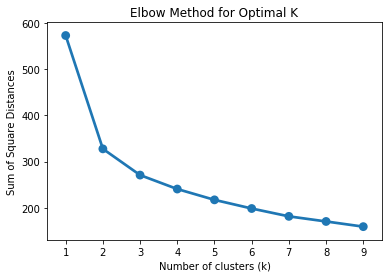

In [118]:
sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters=k, init= 'k-means++', max_iter=1000)
    km = km.fit(df_prod)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

The value of k can be between 2 and 3, so we will try with both to see what can be applied in k-means

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Product amount per cluster')

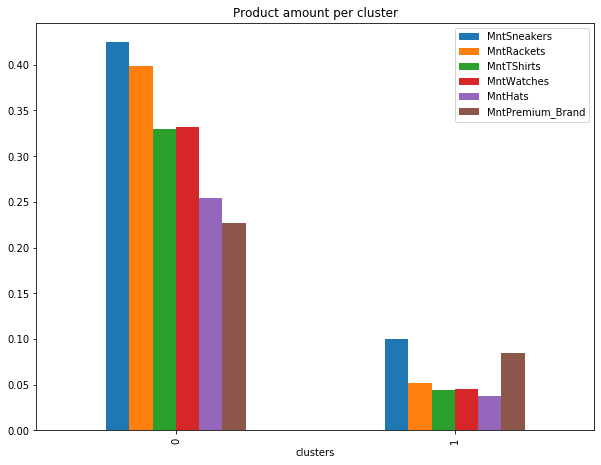

In [119]:
data_array = df_prod.values
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=1234)
df_prod["clusters"] = kmeans.fit_predict(data_array)
df_prod.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Product amount per cluster")

The graphic above we see two well-defined clusters. We see those who spend little and have no product preference and those who spend a lot and who have a special preference for Sneakers and Rackets.

Now we will try three clusters to see if we have a well defined product usage segemtation for our customers:

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Product amount per cluster')

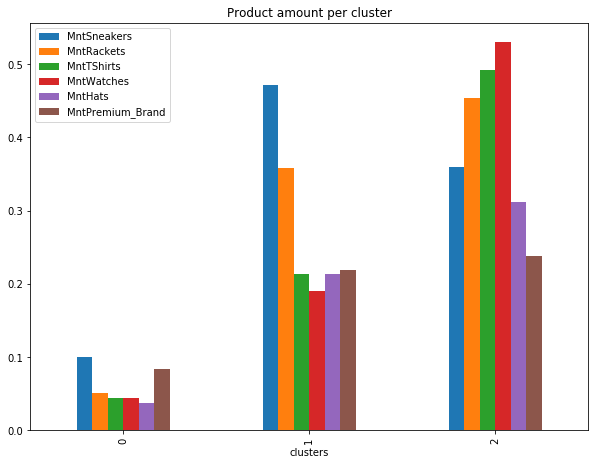

In [120]:
data_array = df_prod.values
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
df_prod["clusters"] = kmeans.fit_predict(data_array)
df_prod.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Product amount per cluster")

With 3 clusters we also managed to have a good definition of our customers:
- those who continue to spend little on all products
- Those who spend a lot on all are products, with the exception of Premium Brand.
- Customers who are in the middle of the table but with a preference for Sneakers and Rakects


We also made a dedrogram to validate the ideal cluster number:

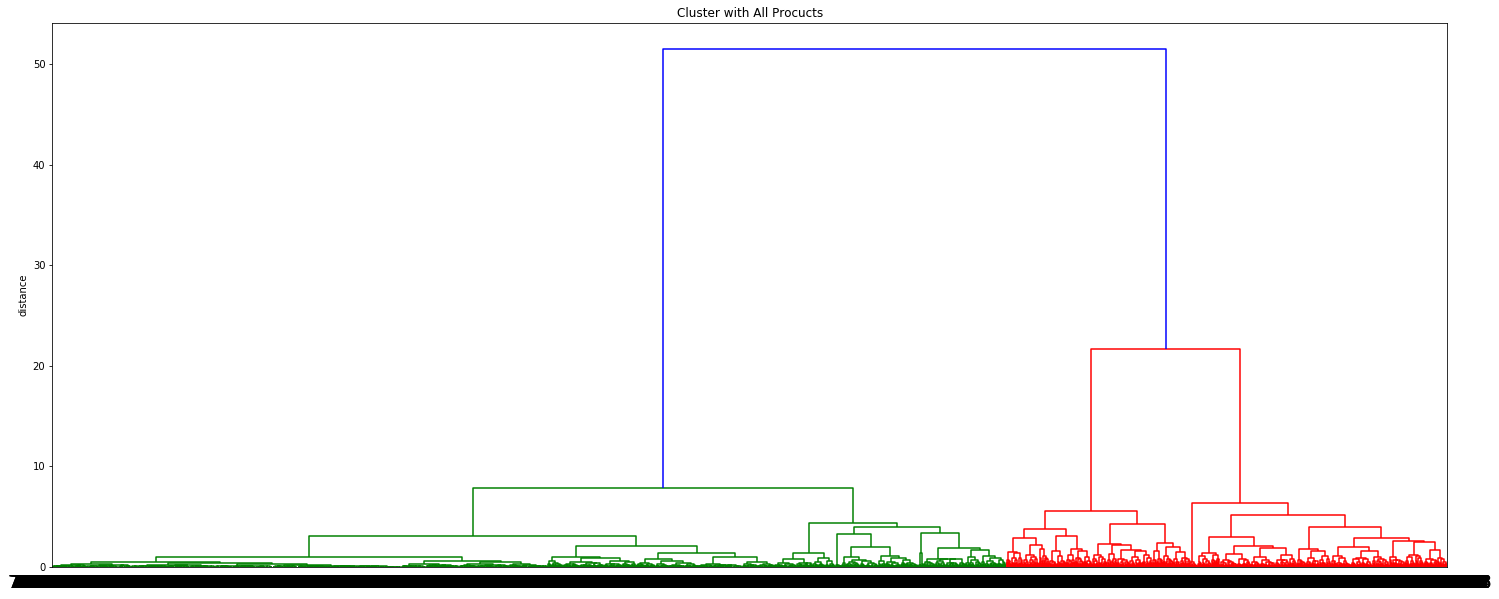

In [121]:
#Finding optimal number of cluster using dendrogram
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z = linkage(df_prod, 'ward')

#plot Dendrogram os clusters
plt.figure(figsize = (25, 10))
plt.title('Cluster with All Procucts')
plt.ylabel('distance')
dendrogram(
    Z,
    labels = df_prod.index,
    leaf_rotation = 0.,
    leaf_font_size = 18.,
)
plt.show()

The above dendrogram returns us  the cluster hierarchy and we can see that the optimal k is 3 (clusters).

## Client Segmentation by Channel

Here we want to have an insight about the channels that customers have available and analyse if there is any segments using NumDealsPurchases, Income and TimeAsCustomer variables.

In [122]:
df_canal = dataset[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Income', 'TimeAsCustomer']]
df_canal.head()

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Custid                                                              
70012576         0.241379             0.461538           0.500000   
70034556         0.172414             0.307692           0.785714   
70021396         0.172414             0.153846           0.285714   
70035464         0.172414             0.230769           0.285714   
70008640         0.241379             0.692308           0.428571   

          NumDealsPurchases    Income  TimeAsCustomer  
Custid                                                 
70012576           0.076923  0.652412            1052  
70034556           0.384615  0.402560            1696  
70021396           0.076923  0.291219            1281  
70035464           0.076923  0.342804            1201  
70008640           0.076923  0.550433            1143

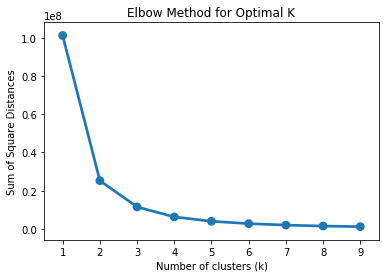

In [123]:
sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters=k, init= 'k-means++', max_iter=1000)
    km = km.fit(df_canal)
    sum_of_sq_dist[k] = km.inertia_
    
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [124]:
# KMeans Clustering Model with 2 cluster
kmeans_1=KMeans(n_clusters=2, max_iter=1000)
kmeans_1.fit(df_canal)
df_canal['Cluster'] = kmeans_1.predict(df_canal)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
labels3 = kmeans_1.labels_
centroids3 = kmeans_1.cluster_centers_
df_cli = df_canal[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Income', 'TimeAsCustomer']]
df_canal["Label"] = labels3

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
import plotly.graph_objs as go 
import plotly as py

df_cli['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df_cli['NumStorePurchases'],
    y= df_cli['NumCatalogPurchases'],
    z= df_cli['TimeAsCustomer'],
    mode='markers',
     marker=dict(
        color = df_cli['label3'], 
        size= 5,
        line=dict(
            color= df_cli['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'NumStorePurchases'),
            yaxis = dict(title  = 'NumCatalogPurchases'),
            zaxis = dict(title  = 'TimeAsCustomer')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
df_canal.groupby('Cluster').describe()

NumWebPurchases                                               \
                  count      mean       std  min       25%       50%   
Cluster                                                                
0                1210.0  0.265204  0.110239  0.0  0.172414  0.241379   
1                1284.0  0.235337  0.117471  0.0  0.172414  0.206897   

                            NumCatalogPurchases                           \
              75%       max               count      mean       std  min   
Cluster                                                                    
0        0.344828  0.965517              1210.0  0.371202  0.215835  0.0   
1        0.275862  1.000000              1284.0  0.322130  0.204996  0.0   

                                           NumStorePurchases            \
              25%       50%       75%  max             count      mean   
Cluster                                                                  
0        0.230769  0.307692  0.461538  1.0            1210.0  0.505962   
1        0.153846  0.230769  0.461538  1.0            1284.0  0.457109   

                                                          NumDealsPurchases  \
              std  min       25%       50%       75%  max             count   
Cluster                                                                       
0        0.239837  0.0  0.285714  0.428571  0.714286  1.0            1210.0   
1        0.235378  0.0  0.285714  0.357143  0.642857  1.0            1284.0   

                                                                          \
             mean       std  min       25%       50%       75%       max   
Cluster                                                                    
0        0.208264  0.161973  0.0  0.076923  0.153846  0.307692  1.000000   
1        0.145099  0.108220  0.0  0.076923  0.076923  0.153846  0.846154   

         Income                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        1210.0  0.395952  0.164771  0.000000  0.262151  0.400847  0.521216   
1        1284.0  0.394870  0.169707  0.010992  0.266426  0.386852  0.529502   

                  TimeAsCustomer                                            \
              max          count         mean         std     min      25%   
Cluster                                                                      
0        0.912285         1210.0  1569.740496   98.369547  1396.0  1484.00   
1        0.882795         1284.0  1220.739097  102.867316  1039.0  1129.75   

                                   Label                                     
            50%      75%     max   count mean  std  min  25%  50%  75%  max  
Cluster                                                                      
0        1570.5  1653.00  1738.0  1210.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        1229.0  1307.25  1395.0  1284.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [128]:
df_canal.head()

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Custid                                                              
70012576         0.241379             0.461538           0.500000   
70034556         0.172414             0.307692           0.785714   
70021396         0.172414             0.153846           0.285714   
70035464         0.172414             0.230769           0.285714   
70008640         0.241379             0.692308           0.428571   

          NumDealsPurchases    Income  TimeAsCustomer  Cluster  Label  
Custid                                                                 
70012576           0.076923  0.652412            1052        1      1  
70034556           0.384615  0.402560            1696        0      0  
70021396           0.076923  0.291219            1281        1      1  
70035464           0.076923  0.342804            1201        1      1  
70008640           0.076923  0.550433            1143        1      1

<p style="text-align: justify">The segmentation provided from the k-means output did not reveal to be useful. The cluster which has the clients with mostdays as customer only shows that have more purchases through all the channels available, also more deals, which makes sense since they've been shopping for longer.</p>

## Segmentation by Demographic Data

<p style="text-align: justify">In this analysis we want to analyse our clients by the demographic characteristics we have available in our dataset. The purpose is to find if there are any groups of individuals with similar characteristics having similar behaviours. The first analysis we will do will use individuals demographic characteristics (Age, Number of children, number of teenagers and marital status) against the number of purchases.</p>

In [129]:
df_dem = dataset[['NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebPurchases', 'Age', 'Kidhome', 'Teenhome', 'MaritalStatusLabel']]
df_dem.head()

NumCatalogPurchases  NumStorePurchases  NumDealsPurchases  \
Custid                                                                
70012576             0.461538           0.500000           0.076923   
70034556             0.307692           0.785714           0.384615   
70021396             0.153846           0.285714           0.076923   
70035464             0.230769           0.285714           0.076923   
70008640             0.692308           0.428571           0.076923   

          NumWebPurchases       Age  Kidhome  Teenhome  MaritalStatusLabel  
Custid                                                                      
70012576         0.241379  0.527273      0.0       0.0                   2  
70034556         0.172414  0.636364      0.0       0.5                   3  
70021396         0.172414  0.381818      1.0       0.0                   1  
70035464         0.172414  0.672727      0.0       0.5                   1  
70008640         0.241379  0.400000      0.0       0.0                   1

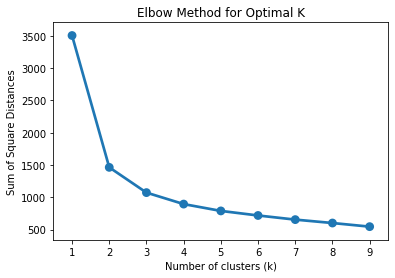

In [130]:
sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters=k, init= 'k-means++', max_iter=1000)
    km = km.fit(df_dem)
    sum_of_sq_dist[k] = km.inertia_
    
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [131]:
#KMeans Clustering Model with 2 cluster
kmeans_1=KMeans(n_clusters=2, max_iter=1000)
kmeans_1.fit(df_dem)
df_dem['Cluster'] = kmeans_1.predict(df_dem)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
labels3 = kmeans_1.labels_
centroids3 = kmeans_1.cluster_centers_
df_cli = df_dem[['NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebPurchases', 'Age', 'Kidhome', 'Teenhome', 'MaritalStatusLabel']]
df_dem["Label"] = labels3

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
import plotly.graph_objs as go 
import plotly as py

df_cli['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df_cli['NumCatalogPurchases'],
    y= df_cli['NumStorePurchases'],
    z= df_cli['NumDealsPurchases'],
    mode='markers',
     marker=dict(
        color = df_cli['label3'], 
        size= 5,
        line=dict(
            color= df_cli['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'NumCatalogPurchases'),
            yaxis = dict(title  = 'NumStorePurchases'),
            zaxis = dict(title  = 'NumDealsPurchases')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
df_dem.groupby('Cluster').describe()

NumCatalogPurchases                                               \
                      count      mean       std  min       25%       50%   
Cluster                                                                    
0                    1277.0  0.344497  0.215006  0.0  0.153846  0.307692   
1                    1217.0  0.347450  0.208269  0.0  0.153846  0.307692   

                       NumStorePurchases                                     \
              75%  max             count      mean       std  min       25%   
Cluster                                                                       
0        0.461538  1.0            1277.0  0.479248  0.242220  0.0  0.285714   
1        0.461538  1.0            1217.0  0.482451  0.235156  0.0  0.285714   

                                 NumDealsPurchases                           \
              50%       75%  max             count      mean       std  min   
Cluster                                                                       
0        0.428571  0.642857  1.0            1277.0  0.175652  0.141233  0.0   
1        0.428571  0.642857  1.0            1217.0  0.175842  0.139837  0.0   

                                                NumWebPurchases            \
              25%       50%       75%       max           count      mean   
Cluster                                                                     
0        0.076923  0.153846  0.230769  0.923077          1277.0  0.249237   
1        0.076923  0.153846  0.230769  1.000000          1217.0  0.250446   

                                                              Age            \
              std  min       25%       50%       75%  max   count      mean   
Cluster                                                                       
0        0.117742  0.0  0.172414  0.241379  0.310345  1.0  1277.0  0.490197   
1        0.112033  0.0  0.172414  0.241379  0.310345  1.0  1217.0  0.501472   

                                                               Kidhome  \
              std       min       25%       50%       75%  max   count   
Cluster                                                                  
0        0.231488  0.018182  0.309091  0.472727  0.690909  1.0  1277.0   
1        0.206050  0.000000  0.345455  0.472727  0.654545  1.0  1217.0   

                                                     Teenhome            \
             mean       std  min  25%  50%  75%  max    count      mean   
Cluster                                                                   
0        0.222396  0.266816  0.0  0.0  0.0  0.5  1.0   1277.0  0.240407   
1        0.229252  0.279565  0.0  0.0  0.0  0.5  1.0   1217.0  0.257190   

                                           MaritalStatusLabel            \
              std  min  25%  50%  75%  max              count      mean   
Cluster                                                                   
0        0.270977  0.0  0.0  0.0  0.5  1.0             1277.0  2.632733   
1        0.272053  0.0  0.0  0.0  0.5  1.0             1217.0  0.823336   

                                             Label                           \
              std  min  25%  50%  75%  max   count mean  std  min  25%  50%   
Cluster                                                                       
0        0.600908  2.0  2.0  3.0  3.0  4.0  1277.0  0.0  0.0  0.0  0.0  0.0   
1        0.381541  0.0  1.0  1.0  1.0  1.0  1217.0  1.0  0.0  1.0  1.0  1.0   

                   
         75%  max  
Cluster            
0        0.0  0.0  
1        1.0  1.0

In [135]:
df_dem['Cluster'].value_counts()

0    1277
1    1217
Name: Cluster, dtype: int64

<p style="text-align: justify">In this first analysis we do not see relevant clustering when using the variables Age, Kidhome, Teehome and MaritalStatusLabel against the number of purchases per channel. Besides the algorithm split customed into two distinct groups with very distinct ages, their behaviour as a LaGoste customer doesn't seems to be relevant as is practically identical.</p>

<p style="text-align: justify">The following analysis will be focusing the same demographic variables against the amount spent on each type of product.</p>

In [136]:
df_dem2 = dataset[['MntSneakers', 'MntRackets', 'MntTShirts', 'MntWatches', 'MntHats', 'MntPremium_Brand', 'Age', 'Kidhome', 'Teenhome', 'MaritalStatusLabel']]
df_dem2.head()

MntSneakers  MntRackets  MntTShirts  MntWatches   MntHats  \
Custid                                                                
70012576     0.126253    0.379586    0.521739    0.432584  0.710526   
70034556     0.482298    0.192128    0.096990    0.050562  0.071429   
70021396     0.013360    0.008005    0.020067    0.011236  0.022556   
70035464     0.052104    0.011341    0.000000    0.000000  0.000000   
70008640     0.224449    0.411608    0.652174    0.932584  0.033835   

          MntPremium_Brand       Age  Kidhome  Teenhome  MaritalStatusLabel  
Custid                                                                       
70012576          0.618736  0.527273      0.0       0.0                   2  
70034556          0.220044  0.636364      0.0       0.5                   3  
70021396          0.013072  0.381818      1.0       0.0                   1  
70035464          0.021786  0.672727      0.0       0.5                   1  
70008640          0.122004  0.400000      0.0       0.0                   1

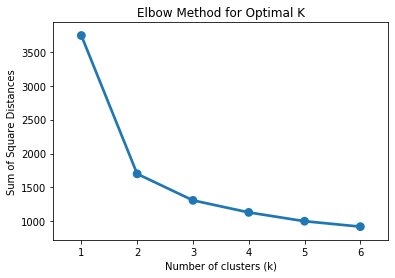

In [137]:
sum_of_sq_dist = {}
for k in range(1,7):
    km = KMeans(n_clusters=k, init= 'k-means++', max_iter=1000)
    km = km.fit(df_dem2)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [138]:
#KMeans Clustering Model with 2 cluster
kmeans_1=KMeans(n_clusters=2, max_iter=1000)
kmeans_1.fit(df_dem2)
df_dem2['Cluster'] = kmeans_1.predict(df_dem2)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
labels3 = kmeans_1.labels_
centroids3 = kmeans_1.cluster_centers_
df_cli2 = df_dem2[['MntSneakers', 'MntRackets', 'MntTShirts', 'MntWatches', 'MntHats', 'MntPremium_Brand', 'Age', 'Kidhome', 'Teenhome', 'MaritalStatusLabel']]
df_dem2["Label"] = labels3

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
import plotly.graph_objs as go 
import plotly as py

df_cli2['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df_cli2['Age'],
    y= df_cli2['MntPremium_Brand'],
    z= df_cli2['MntSneakers'],
    mode='markers',
     marker=dict(
        color = df_cli2['label3'], 
        size= 5,
        line=dict(
            color= df_cli2['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'MntPremium_Brand'),
            zaxis = dict(title  = 'MntSneakers')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
df_dem2.groupby('Cluster').describe()

MntSneakers                                                         \
              count      mean       std  min       25%       50%       75%   
Cluster                                                                      
0            1217.0  0.206469  0.228467  0.0  0.017368  0.119572  0.346025   
1            1277.0  0.198394  0.221037  0.0  0.015364  0.108884  0.337341   

                 MntRackets                                                    \
             max      count      mean       std       min       25%       50%   
Cluster                                                                         
0        1.00000     1217.0  0.160947  0.212979  0.000667  0.016011  0.063376   
1        0.97996     1277.0  0.161129  0.212239  0.000000  0.014009  0.063376   

                            MntTShirts                                     \
              75%       max      count      mean       std  min       25%   
Cluster                                                                     
0        0.216144  1.000000     1217.0  0.135923  0.201967  0.0  0.010033   
1        0.229486  0.968646     1277.0  0.132881  0.198610  0.0  0.010033   

                                      MntWatches                           \
              50%       75%       max      count      mean       std  min   
Cluster                                                                     
0        0.040134  0.170569  1.000000     1217.0  0.135372  0.201565  0.0   
1        0.046823  0.167224  0.993311     1277.0  0.135465  0.200279  0.0   

                                           MntHats                           \
              25%       50%       75%  max   count      mean       std  min   
Cluster                                                                       
0        0.011236  0.044944  0.168539  1.0  1217.0  0.109291  0.172038  0.0   
1        0.011236  0.050562  0.168539  1.0  1277.0  0.102851  0.161616  0.0   

                                           MntPremium_Brand            \
              25%       50%       75%  max            count      mean   
Cluster                                                                 
0        0.007519  0.033835  0.135338  1.0           1217.0  0.129163   
1        0.007519  0.033835  0.124060  1.0           1277.0  0.129738   

                                                                   Age  \
              std  min       25%       50%       75%       max   count   
Cluster                                                                  
0        0.161407  0.0  0.026144  0.069717  0.165577  0.982571  1217.0   
1        0.161871  0.0  0.023965  0.069717  0.167756  1.000000  1277.0   

                                                                          \
             mean       std       min       25%       50%       75%  max   
Cluster                                                                    
0        0.501472  0.206050  0.000000  0.345455  0.472727  0.654545  1.0   
1        0.490197  0.231488  0.018182  0.309091  0.472727  0.690909  1.0   

        Kidhome                                              Teenhome  \
          count      mean       std  min  25%  50%  75%  max    count   
Cluster                                                                 
0        1217.0  0.229252  0.279565  0.0  0.0  0.0  0.5  1.0   1217.0   
1        1277.0  0.222396  0.266816  0.0  0.0  0.0  0.5  1.0   1277.0   

                                                     MaritalStatusLabel  \
             mean       std  min  25%  50%  75%  max              count   
Cluster                                                                   
0        0.257190  0.272053  0.0  0.0  0.0  0.5  1.0             1217.0   
1        0.240407  0.270977  0.0  0.0  0.0  0.5  1.0             1277.0   

                                                       Label                 \
             mean       std  min  25%  50%  75%  max   count mean  std  min   
Cluster                  

<p style="text-align: justify">The results above didn't show any significant clustering output. As we can see Age, MaritalStatus and Kids/Teens are  irrelevant to distinguish the groups.</p>

## Results

### Customer Segmentation by Loyalty and Value

After the clustering proccess we got each customer assigned to a cluster based on the RFM model. From the six clusters we are able to observe the following in wach one of them:

- <p style="text-align: justify">Cluster with <b>Champion Customers</b> - This cluster has the best and most loyal company customers, low recency, high number of purchases and high spend amounts. LaGoste might consider to reward them, for their beahviour they might be early adopters of new products.</p>

- <p style="text-align: justify">Cluster with <b>Loyal Customers</b> - This might be considered the cluster where LaGoste can find the most number of loyal customers. Their Recency average is around 20 and goes to the maximum of 37 days. The total purchases and total amounts are quite high. Which means they bought a lot of products to the company and aren't too much time without doing it.</p>

- <p style="text-align: justify">Cluster with <b>Potential Loyal Customers</b> - This cluster has a relatively high RFM score (8,34 - which is not good). However, a low Recency and a medium Frequency and Monetary parameters reveals that they might become loyal customers. Marketing should consider membership programs or recomend products related to their preferences.</p>

- <p style="text-align: justify">Cluster with <b>New Customers</b> - This cluster has only customers who made 1 to 4 purchases with a shy amount spent. The marketing department should consider find a way to engage with new clients so they can start becoming familiar with the company in the firsts visits or purchases. This cluster only has 33 customers and some of them doesn't buy products for a quite some time, this can mean two things: wether the ocasional clients do not register or the compay is failing in atracting new customers. The company need some marketing strategies to atract new customers and to engage them with the company as they will play a roll in increasing profits in the next years.</p>

- <p style="text-align: justify">Cluster with <b>Hibernating Customers</b> - This is a group of customers that made already some purchases and spent a medium amount of money in company's products. However, they need some attention because the relationship is becoming at risk since they haven't purchased anything recently. These customers should have a specific campaign to to be reconnected with the company.</p>

- <p style="text-align: justify">Cluster with <b>Lacking of Attention Customers</b> - Cluster with a large group of customers who used to purchase frequently but haven't done it for a long time. They are at risk and the company might be losing some of them if it doesn't act in order to understand why they didn't bought recently. Making surveys to understand if there is any reason and offering relevant deals might help.</p>

### Customer Segmentation by Product Usage

<p style="text-align: justify">The analysis made in the product use segment was based on the amounts spent on them. We concluded that we managed to have 3 well-defined clusters of customers: customers who spend little amount, customers who spend a lot and customers who are in the middle of the table with some preferences.</p>
<p style="text-align: justify">With this information, in a future campaign for these products, LaGoste can redirect to the target audience or even make a promotion campaign to customers who spend less, in order to captivate them.</p>

### Client Segmentation by Channel

<p style="text-align: justify">The client segmentation by channel didn't reveal any useful information. Besides the cluster analysis that we provided, we also tested other variables and the results were not conclusive: our customer data doesn't seems to impact the way customers are buying. This might also be checked in the correlation table (2.12), where the channels correlation with other variables are only expressive when it comes with amounts and income (more amounts spend, more purchases through the channels).</p>

### Segmentation by Demographic Data

<p style="text-align: justify">Our objective in this analysis was to find relevant demographic characteristics to help explain any customer behaviour. In a first approach we have observed that LaGoste customers behaviour doesn't differ accordingly with their characteristics in terms of number of purchases.</p>
<p style="text-align: justify">In a second approach we took a look at the amounts spend in their purchases, while having in consideration the same demographic charateristics. Here we observed that there might be a relation with the number of children. It was visible that the segment of clients that spends less amounts in their purchases have, in avarage more children (kids and teenagers) than the segment that spends more.</p>

## Conclusions

<p style="text-align: justify">After analysing the provided dataset we have reached the following conclusions:</p>
    <p style="text-align: justify">- The bigger the income, the higher the amount spent;</p>
    <p style="text-align: justify">- The customers who spend the most money spend a big parcel of it in Snickers and Rackets;</p>
    <p style="text-align: justify">- There isn't any relation between the demographic characteristics provided and consumption habits. </p>